##### <strong><div align="center"> Data Scientist IBM Professional Certification</div></strong>  
###### <div align="center"> Course 9: Capstone Project</div>  

# Insight into Collision Accidents in Seattle, 2004-2020
Data Science: Towards Zero Collision Accident!

*Published by **Ihsan Ahmad Zulkarnain**, Indonesia, 25 September 2020*

## <a name="ToC">Table of Contents</a>
1. [Import CSV to Dataframe](#1)  
2. [Data Cleaning](#2)  
    2.1. [Choosing or extracting relevant features](#2.1)
3. [Exploratory Data Analysis and Data Visualization](#3)  
    3.1. [Descriptive Statistics](#3.1)  
    3.2. [Grouping Data into Categories](#3.2)  
    3.3. [ANOVA](#3.3)  
    3.4. [Correlation](#3.4)  
    3.5. [Data Visualization: Waffle Chart](#3.5)  
    3.6. [Data Visualization: Map with MarkerCluster](#3.6)    
    3.7. [Data Visualization: Choropleth Map](#3.7)  
    3.7.1. [City Council District](#3.7.1)  
    3.7.2. [Neighborhoods - 2009 and 2019](#3.7.2)  
    3.7.3. [Neighborhoods - Number Density - 2009](#3.7.3)  
    3.7.4. [Neighborhoods - Number Density - 2019](#3.7.4)  
4. [Accident Severity Classification](#4)  
    4.1. [Data Preparation](#4.1)  
    4.1.1 [One Hot Encoding](#4.1.1)  
    4.1.2 [Feature Selection](#4.1.2)  
    4.1.3 [Standard Scaling](#4.1.3)  
    4.1.4 [Training-Test Set Splitting](#4.1.4)  
    4.2. [K-Nearest Neighbors](#4.2)  
    4.3. [Decision Tree](#4.3)  
    4.4. [SVM](#4.4)  
    4.5. [Logistic Regression](#4.5)  
    4.6. [Model Evaluation using Test Set](#4.6)  
    4.6.1 [Test Set for Evaluation (Jan-May 2020)](#4.6.1)  
    4.6.2 [Metrics Calculations](#4.6.2)  
    4.6.3 [Summary](#4.6.3)    

## <a name="1"></a>1. Import CSV to Pandas Dataframe [[ToC]](#ToC)

In [1]:
import numpy as np
import pandas as pd
import tabulate
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

Remove the hash and run the next cell to download the CSV file

In [2]:
# !wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

Read CSV File to Pandas Dataframe

In [3]:
def tableMD(DF):
    print(tabulate.tabulate(DF.values,DF.columns, tablefmt="pipe"))

In [4]:
df_v0 = pd.read_csv('Data-Collisions.csv', low_memory=False)
df_v0.head()
#tableMD(df_v0.head())

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


_List all columns_

In [5]:
df_v0.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

## <a name="2"></a>2. Data Cleaning [[ToC]](#ToC)

### <a name="2.1"></a>2.1. Choosing or extracting relevant features [[ToC]](#ToC)  
*Explanation: X means the feature is not included in the analysis*  

|Var|Dtype|index|comments|
|---|---|---|---|
|SEVERITYCODE|        int64|   0||
|X|                 float64|   1|| 
|Y|                 float64|   2||  
|OBJECTID|            int64|   X|Only a data identifier| 
|INCKEY|              int64|   X|Only a data identifier| 
|COLDETKEY|           int64|   X|Only a data identifier| 
|REPORTNO|           object|   X|Only a data identifier| 
|STATUS|             object|   X|No explanation in the metadata pdf file|
|ADDRTYPE|           object|   3||  
|INTKEY|            float64|   4||  
|LOCATION|           object|   5||  
|EXCEPTRSNCODE|      object|   X|No explanation in the metadata pdf file| 
|EXCEPTRSNDESC|      object|   X|No explanation in the metadata pdf file| 
|SEVERITYCODE.1|      int64|   X|a duplicate|  
|SEVERITYDESC|       object|   X|a duplicate (only a description of a code)|  
|COLLISIONTYPE|      object|   6||  
|PERSONCOUNT|         int64|   7||  
|PEDCOUNT|            int64|   8||  
|PEDCYLCOUNT|         int64|   9||  
|VEHCOUNT|            int64|   10||  
|INCDATE|            object|   11||  
|INCDTTM|            object|   12||  
|JUNCTIONTYPE|       object|   13||  
|SDOT_COLCODE|        int64|   14,15|   can be splitted (10A+B)|  
|SDOT_COLDESC|       object|   X|a duplicate (only a description of a code)|  
|INATTENTIONIND|     object|   16|  Y is True, blank is False|  
|UNDERINFL|          object|   17|  Y and 1 is True, N and 0 is False, (Empty) is NaN||  
|WEATHER|            object|   18|  Blowing Sand/Dirt, Clear, Fog/Smog/Smoke, Other, Overcast, Partly Cloudy, Raining, Severe Crosswind, Sleet/Hail/Freezing Rain, Snowing, Unknown, (Empty)|  
|ROADCOND|           object|   19|  Dry, Ice, Oil, Other, Sand/Mud/Dirt, Snow/Slush, Standing Water, Unknown, Wet, (Empty)|  
|LIGHTCOND|          object|   20|  Dark - No Street Lights, Dark - Street Lights Off, Dark - Street Lights On, Dark - Unknown Lighting, Dawn, Daylight, Dusk, Other,  Unknown, (Empty)|  
|PEDROWNOTGRNT|      object|   21|  Y is True, (Empty) is False|  
|SDOTCOLNUM|        float64|   X|Not enough explanation in the metadata pdf file|    
|SPEEDING|           object|   22|  Y is True, (Empty) is False|  
|ST_COLCODE|         object|   23|  blank or space must be corrected to (Empty) or Unknown and convert dtype to int|  
|ST_COLDESC|         object|   X||  
|SEGLANEKEY|          int64|   24|  0 is unknown, the feature is relevant only for pedalcyclist|  
|CROSSWALKKEY|        int64|   25|  0 is unknown, the feature is relevant only for pedalcyclist and pedastrian|  
|HITPARKEDCAR|       object|   26|  N is False, Y is True|  

### df_v1 is df_v0 after splitting SDOT_COLCODE (10A+B) into A and B

In [6]:
df_temp1 = (df_v0[['SDOT_COLCODE']]/10).round().astype('int64')
df_temp2 = (df_v0[['SDOT_COLCODE']]%10).astype('int64')
df_v1 = df_v0
df_v1['SDOT_COLCODE'] = df_temp1
df_v1.rename(columns={"SDOT_COLCODE": "SDOT_COLCODE_A"},inplace=True)
df_v1[['SDOT_COLCODE_A']].head()

,SDOT_COLCODE_A
0,1
1,2
2,1
3,1
4,1


In [7]:
df_v1.insert(24,"SDOT_COLCODE_B",df_temp2)
df_v1[['SDOT_COLCODE_B']].head()

,SDOT_COLCODE_B
0,1
1,6
2,4
3,1
4,1


In [8]:
df_v2 = df_v1[['SEVERITYCODE',
                'X',
                'Y',
                'ADDRTYPE',
                'INTKEY',
                'LOCATION',
                'COLLISIONTYPE',
                'PERSONCOUNT',
                'PEDCOUNT',
                'PEDCYLCOUNT',
                'VEHCOUNT',
                'INCDATE',
                'INCDTTM',
                'JUNCTIONTYPE',
                'SDOT_COLCODE_A',
                'SDOT_COLCODE_B',
                'INATTENTIONIND',
                'UNDERINFL',
                'WEATHER',
                'ROADCOND',
                'LIGHTCOND',
                'PEDROWNOTGRNT',
                'SPEEDING',
                'ST_COLCODE',
                'SEGLANEKEY',
                'CROSSWALKKEY',
                'HITPARKEDCAR',
                ]].copy()

In [9]:
df_v2['INCDATE'] = pd.to_datetime(df_v2['INCDATE']).copy()
df_v2['INCDTTM'] = pd.to_datetime(df_v2['INCDTTM']).copy()

In [10]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   SEVERITYCODE    194673 non-null  int64              
 1   X               189339 non-null  float64            
 2   Y               189339 non-null  float64            
 3   ADDRTYPE        192747 non-null  object             
 4   INTKEY          65070 non-null   float64            
 5   LOCATION        191996 non-null  object             
 6   COLLISIONTYPE   189769 non-null  object             
 7   PERSONCOUNT     194673 non-null  int64              
 8   PEDCOUNT        194673 non-null  int64              
 9   PEDCYLCOUNT     194673 non-null  int64              
 10  VEHCOUNT        194673 non-null  int64              
 11  INCDATE         194673 non-null  datetime64[ns, UTC]
 12  INCDTTM         194673 non-null  datetime64[ns]     
 13  JUNCTIONTYPE  

## <a name="3"></a>3. Exploratory Data Analysis and Data Visualization [[ToC]](#ToC)

### <a name="3.1"></a>3.1. Descriptive Statistics [[ToC]](#ToC)

In [11]:
df_v2.describe()
#tableMD(df_v2.describe().reset_index())

,SEVERITYCODE,X,Y,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE_A,SDOT_COLCODE_B,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,37558.450576,2.444427,0.037139,0.028391,1.920780,1.253276,2.841637,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,51745.990273,1.345929,0.198150,0.167413,0.631047,0.763915,2.218719,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,28667.000000,2.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,29973.000000,2.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,33973.000000,3.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,757580.000000,81.000000,6.000000,2.000000,12.000000,7.000000,9.000000,525241.000000,5.239700e+06


In [12]:
df_v2['SEVERITYCODE'].value_counts(dropna=False).to_frame()
#tableMD(df_v2['SEVERITYCODE'].value_counts(dropna=False).to_frame().reset_index())

,SEVERITYCODE
1,136485
2,58188


In [13]:
df_v2['ADDRTYPE'].value_counts(dropna=False).to_frame()
#a = df_v2['ADDRTYPE'].value_counts(dropna=False).to_frame()
#tableMD(a.reset_index())

,ADDRTYPE
Block,126926
Intersection,65070
NaN,1926
Alley,751


In [14]:
df_v2['COLLISIONTYPE'].value_counts(dropna=False).to_frame()
#a = 
#tableMD(a.reset_index())

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
NaN,4904
Right Turn,2956


In [15]:
df_v2['JUNCTIONTYPE'].value_counts(dropna=False).to_frame()
#a = 
#tableMD(a.reset_index())

,JUNCTIONTYPE
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
NaN,6329
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


In [16]:
df_v2['SDOT_COLCODE_A'].value_counts(dropna=False).to_frame()
#a = 
#tableMD(a.reset_index())

,SDOT_COLCODE_A
1,146800
2,21578
3,14504
0,9787
5,1573
6,317
7,96
4,18


In [17]:
df_v2['SDOT_COLCODE_B'].value_counts(dropna=False).to_frame()
#a = 
#tableMD(a.reset_index())

,SDOT_COLCODE_B
1,86813
4,61132
6,14879
8,12076
0,9787
3,6038
5,1762
2,1471
9,548
7,167


In [18]:
df_v2['WEATHER'].value_counts(dropna=False).to_frame()
#a = 
#tableMD(a.reset_index())

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
NaN,5081
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56


In [19]:
df_v2['ROADCOND'].value_counts(dropna=False).to_frame()
#a = 
#tableMD(a.reset_index())

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
NaN,5012
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [20]:
df_v2['LIGHTCOND'].value_counts(dropna=False).to_frame()
#a = 
#tableMD(a.reset_index())

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
NaN,5170
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [21]:
df_v2['ST_COLCODE'].value_counts(dropna=False).to_frame()
#a = 
#tableMD(a.reset_index())

,ST_COLCODE
32,44421
10,34674
14,25771
50,13554
11,12777
...,...
87,2
43,2
85,1
60,1


In [22]:
df_v2['SEGLANEKEY'].value_counts(dropna=False).to_frame()
#a = 
#tableMD(a.reset_index())

,SEGLANEKEY
0,191907
6532,19
6078,16
12162,15
10336,14
...,...
35157,1
10817,1
15043,1
525169,1


In [23]:
df_v2['CROSSWALKKEY'].value_counts(dropna=False).to_frame()
#a = 
#tableMD(a.reset_index())

,CROSSWALKKEY
0,190862
523609,17
520838,15
525567,13
521707,10
...,...
521019,1
630862,1
25545,1
523322,1


### <a name="3.2"></a>3.2. Grouping Data into Categories [[ToC]](#ToC)

#### <a name="3.2.1"></a>3.2.1. Accident numbers by weather and severity [[ToC]](#ToC)

In [24]:
df_grouped_w = df_v2.groupby(['WEATHER'], dropna=False)['SEVERITYCODE'].value_counts(dropna=False).to_frame(name='value_counts')
df_grouped_w
#a = 
#tableMD(a.reset_index())


value_counts
WEATHER                  SEVERITYCODE              
Blowing Sand/Dirt        1                       41
                         2                       15
Clear                    1                    75295
                         2                    35840
Fog/Smog/Smoke           1                      382
                         2                      187
Other                    1                      716
                         2                      116
Overcast                 1                    18969
                         2                     8745
Partly Cloudy            2                        3
                         1                        2
Raining                  1                    21969
                         2                    11176
Severe Crosswind         1                       18
                         2                        7
Sleet/Hail/Freezing Rain 1                       85
                         2                       28
Snowing                  1                      736
                         2                      171
Unknown                  1                    14275
                         2                      816
NaN                      1                     3997
                         2                     1084

<AxesSubplot:ylabel='WEATHER,SEVERITYCODE'>

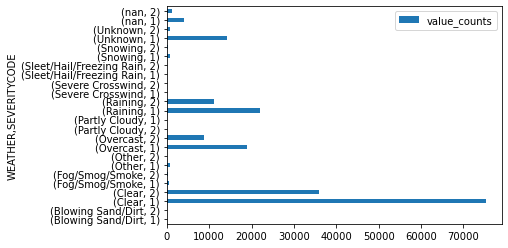

In [25]:
df_grouped_w.plot.barh()

_Since the generated chart is visually not easy to understand, we change the way we generate the category grouping_

In [26]:
df_weather_severity = df_v2[['WEATHER']]
df_weather_severity = df_weather_severity.replace(np.nan,'Unknown')

In [27]:
df_weather_severity = pd.concat([df_weather_severity,pd.get_dummies(df_v2['SEVERITYCODE'])], axis=1)
df_weather_severity.rename(columns={1: "NO_INJURY",2: "WITH_INJURY"},inplace=True)
df_weather_severity
#a = 
#tableMD(a.reset_index())

,WEATHER,NO_INJURY,WITH_INJURY
0,Overcast,0,1
1,Raining,1,0
2,Overcast,1,0
3,Clear,1,0
4,Raining,0,1
...,...,...,...
194668,Clear,0,1
194669,Raining,1,0
194670,Clear,0,1
194671,Clear,0,1


In [28]:
df_grouped_w_for_plot = df_weather_severity.groupby(['WEATHER'], dropna=False).sum().sort_values(by=["WITH_INJURY"],ascending=[0])
df_grouped_w_for_plot
#a = 
#tableMD(a.reset_index())

,NO_INJURY,WITH_INJURY
WEATHER,,
Clear,75295.0,35840.0
Raining,21969.0,11176.0
Overcast,18969.0,8745.0
Unknown,18272.0,1900.0
Fog/Smog/Smoke,382.0,187.0
Snowing,736.0,171.0
Other,716.0,116.0
Sleet/Hail/Freezing Rain,85.0,28.0
Blowing Sand/Dirt,41.0,15.0


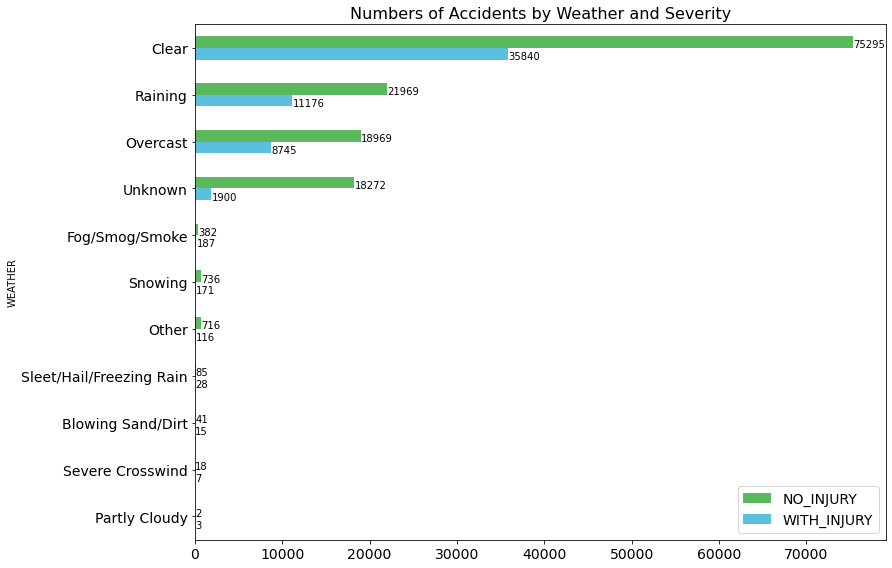

In [29]:
#fig = plt.figure()
# fig.set_figwidth(1) # set width
# fig.set_figheight(18) # set height
fig, ax = plt.subplots()
ax = df_grouped_w_for_plot.plot(kind="barh",figsize=(12.5,8), rot=0,
                          color=['#5cb85c', '#5bc0de', '#d9534f'], 
                          fontsize=14, ax=ax
                         )

ax.legend(fontsize=14, loc=4)
ax.set_title("Numbers of Accidents by Weather and Severity",fontsize=16)
plt.tight_layout()

def autolabel(ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in ax.patches:
        width = rect.get_width()
        ax.annotate('{}'.format(int(width)),
                    xy=(width, rect.get_y() + rect.get_height() / 2 * 2.8),
                    xytext=(0, 3),  # 3 points vertical offset
                    fontsize=10,
                    textcoords="offset points",
                    ha='left', va='bottom')
    return ax

ax = autolabel(ax)
ax.invert_yaxis()

#for p in ax.patches:
#        ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005))

In [30]:
fig.savefig('img/numbers_weather')

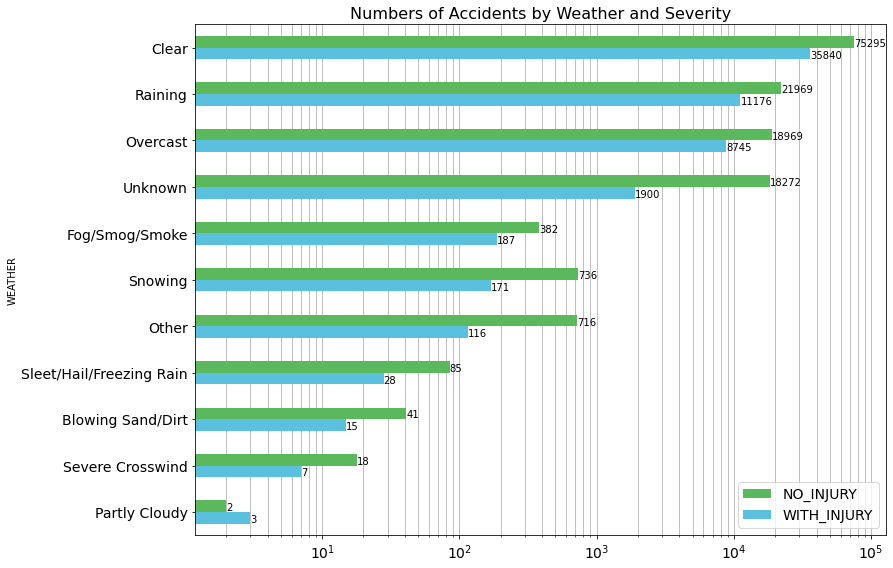

In [31]:
#fig = plt.figure()
# fig.set_figwidth(1) # set width
# fig.set_figheight(18) # set height
fig, ax = plt.subplots()
ax = df_grouped_w_for_plot.plot(kind="barh",figsize=(12.5,8), rot=0,
                          color=['#5cb85c', '#5bc0de', '#d9534f'], 
                          fontsize=14, logx=True, zorder=2, ax=ax
                         )

ax.grid(which='both',axis='x', zorder=0)

ax.legend(fontsize=14, loc=4)
ax.set_title("Numbers of Accidents by Weather and Severity",fontsize=16)
plt.tight_layout()

def autolabel(ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in ax.patches:
        width = rect.get_width()
        ax.annotate('{}'.format(int(width)),
                    xy=(width, rect.get_y() + rect.get_height() / 2 * 2.6),
                    xytext=(0, 3),  # 3 points vertical offset
                    fontsize=10,
                    textcoords="offset points",
                    ha='left', va='bottom')
    return ax

ax = autolabel(ax)
ax.invert_yaxis()

#for p in ax.patches:
#        ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005))

In [32]:
fig.savefig('img/numbers_weather_log')

#### <a name="3.2.2"></a>3.2.2. Accident numbers by road condition and severity [[ToC]](#ToC)

In [33]:
df_road_severity = df_v2[['ROADCOND']]
df_road_severity = df_road_severity.replace(np.nan,'Unknown')

In [34]:
df_road_severity = pd.concat([df_road_severity,pd.get_dummies(df_v2['SEVERITYCODE'])], axis=1)
df_road_severity.rename(columns={1: "NO_INJURY",2: "WITH_INJURY"},inplace=True)

In [35]:
df_road_severity.head()
#a = 
#tableMD(a.reset_index())

,ROADCOND,NO_INJURY,WITH_INJURY
0,Wet,0,1
1,Wet,1,0
2,Dry,1,0
3,Dry,1,0
4,Wet,0,1


In [36]:
df_grouped_r_for_plot = df_road_severity.groupby(['ROADCOND'], dropna=False).sum().sort_values(by=["WITH_INJURY"],ascending=[0])

In [37]:
df_grouped_r_for_plot
#a = 
#tableMD(a.reset_index())

,NO_INJURY,WITH_INJURY
ROADCOND,,
Dry,84446.0,40064.0
Wet,31719.0,15755.0
Unknown,18281.0,1809.0
Ice,936.0,273.0
Snow/Slush,837.0,167.0
Other,89.0,43.0
Standing Water,85.0,30.0
Oil,40.0,24.0
Sand/Mud/Dirt,52.0,23.0


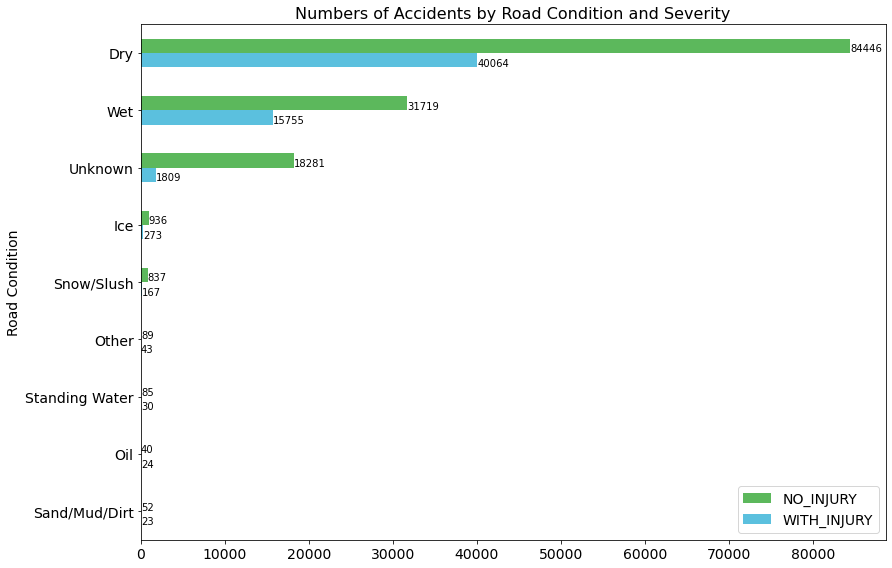

In [38]:
#fig = plt.figure()
# fig.set_figwidth(1) # set width
# fig.set_figheight(18) # set height
fig, ax = plt.subplots()
ax = df_grouped_r_for_plot.plot(kind="barh",figsize=(12.5,8), rot=0,
                          color=['#5cb85c', '#5bc0de', '#d9534f'], 
                          fontsize=14, ax=ax
                         )

ax.legend(fontsize=14, loc=4)
ax.set_title("Numbers of Accidents by Road Condition and Severity",fontsize=16)
ax.set_ylabel("Road Condition",fontsize=14)
plt.tight_layout()

def autolabel(ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in ax.patches:
        width = rect.get_width()
        ax.annotate('{}'.format(int(width)),
                    xy=(width, rect.get_y() + rect.get_height() / 2 * 2.5),
                    xytext=(0, 3),  # 3 points vertical offset
                    fontsize=10,
                    textcoords="offset points",
                    ha='left', va='bottom')
    return ax

ax = autolabel(ax)
ax.invert_yaxis()

#for p in ax.patches:
#        ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005))

In [39]:
fig.savefig('img/numbers_road')

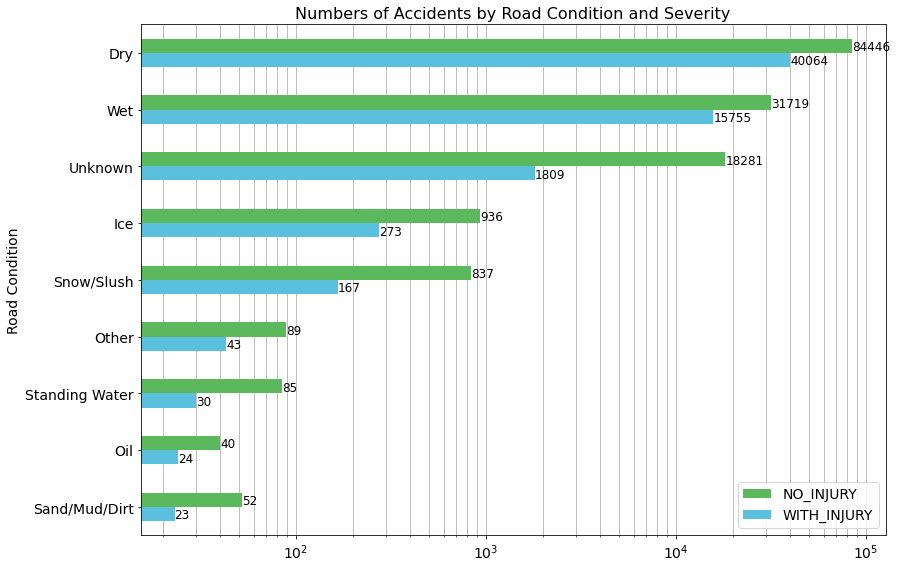

In [40]:
# zorder=N to put the object into the Nth-layer
fig, ax = plt.subplots()
ax = df_grouped_r_for_plot.plot(kind="barh",figsize=(12.5,8), rot=0,
                          color=['#5cb85c', '#5bc0de', '#d9534f'], 
                          fontsize=14, logx=True, zorder=2, ax=ax
                         )

ax.grid(which='both',axis='x', zorder=0)

ax.legend(fontsize=14, loc=4)
ax.set_title("Numbers of Accidents by Road Condition and Severity",fontsize=16)
ax.set_ylabel("Road Condition",fontsize=14)
plt.tight_layout()

def autolabel(ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in ax.patches:
        width = rect.get_width()
        ax.annotate('{}'.format(int(width)),
                    xy=(width, rect.get_y() + rect.get_height() / 2 * 2.5),
                    xytext=(0, 3),  # 3 points vertical offset
                    fontsize=12,
                    textcoords="offset points",
                    ha='left', va='bottom')
    return ax

ax = autolabel(ax)
ax.invert_yaxis()
#for p in ax.patches:
#        ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005))

In [41]:
fig.savefig('img/numbers_road_log')

#### <a name="3.2.3"></a>3.2.3. Accident number by date and time [[ToC]](#ToC)

In [42]:
df_year_severity = df_v2[['INCDATE','INCDTTM']]
#df_year_severity = df_year_severity.replace(np.nan,'Unknown')

In [43]:
df_year_severity = pd.concat([df_year_severity,pd.get_dummies(df_v2['SEVERITYCODE'])], axis=1)
df_year_severity.rename(columns={1: "NO_INJURY",2: "WITH_INJURY"},inplace=True)
df_year_severity.sort_values(by=["INCDATE"],ascending=[1], inplace=True)

In [44]:
df_year_severity.head()
#a = 
#tableMD(a.reset_index())

,INCDATE,INCDTTM,NO_INJURY,WITH_INJURY
9398,2004-01-01 00:00:00+00:00,2004-01-01,0,1
7996,2004-01-01 00:00:00+00:00,2004-01-01,1,0
6679,2004-01-01 00:00:00+00:00,2004-01-01,1,0
13914,2004-01-01 00:00:00+00:00,2004-01-01,1,0
4866,2004-01-01 00:00:00+00:00,2004-01-01,1,0


In [45]:
df_month_severity_plot = df_year_severity.groupby(df_year_severity['INCDATE'].dt.strftime('%m'), dropna=False).sum()
#a = 
#tableMD(a.reset_index())

In [46]:
df_month_severity_plot
#a = 
#tableMD(a.reset_index())

,NO_INJURY,WITH_INJURY
INCDATE,,
01,11704.0,4703.0
02,10293.0,4097.0
03,11415.0,4735.0
04,11216.0,4762.0
05,11567.0,5196.0
06,11638.0,4928.0
07,11227.0,5137.0
08,11214.0,5082.0
09,11053.0,4811.0


In [47]:
df_year_severity_plot = df_year_severity.groupby(df_year_severity['INCDATE'].dt.strftime('%Y-%m')).sum()
df_year_severity_plot

,NO_INJURY,WITH_INJURY
INCDATE,,
2004-01,688.0,288.0
2004-02,650.0,243.0
2004-03,715.0,315.0
2004-04,719.0,334.0
2004-05,754.0,394.0
...,...,...
2020-01,571.0,229.0
2020-02,427.0,174.0
2020-03,291.0,148.0


Text(0, 0.5, 'Severity Percentage')

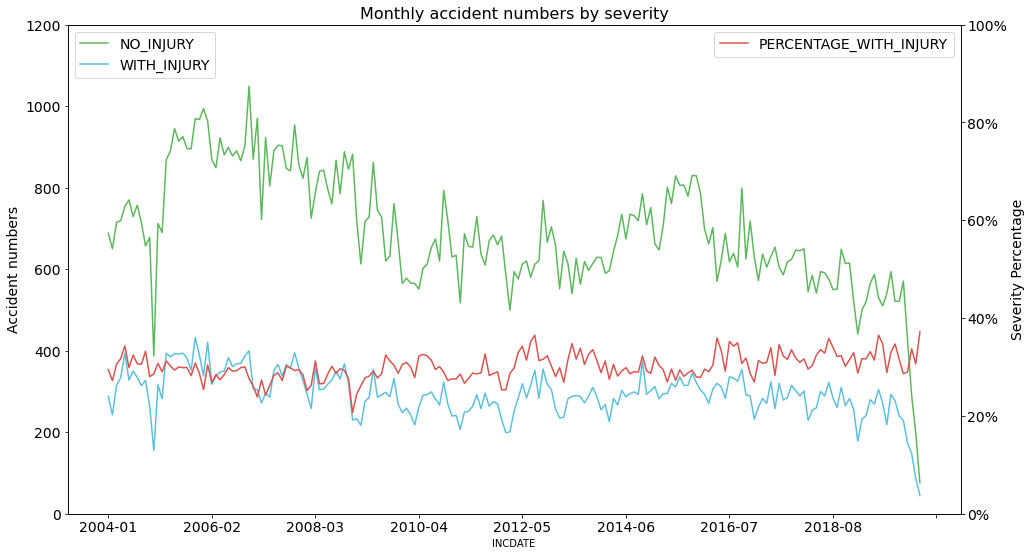

In [48]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_year_severity_plot.plot(kind='line',figsize=(16,9), rot=0,
                          color=['#5cb85c', '#5bc0de', '#d9534f'], 
                          fontsize=14, zorder=2, ax=ax0
                         )

df_year_severity_percentage_plot = pd.DataFrame(
    data=df_year_severity_plot['WITH_INJURY']/(df_year_severity_plot['WITH_INJURY']+df_year_severity_plot['NO_INJURY']),
    columns=['PERCENTAGE_WITH_INJURY'])

df_year_severity_percentage_plot.plot(kind='line',figsize=(16,9), rot=0,
                          color=['#d9534f'], 
                          fontsize=14, zorder=2, ax=ax1
                         )

ax0.legend(fontsize=14, loc=2)
ax1.legend(fontsize=14, loc=1)

ax0.set_ylim(0,1200)
ax1.set_ylim(0,1)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax0.set_title("Monthly accident numbers by severity",fontsize=16)
ax0.set_ylabel("Accident numbers",fontsize=14)
ax1.set_ylabel("Severity Percentage",fontsize=14)

In [49]:
fig0.savefig('img/monthly_numbers')

In [50]:
df_quarter_severity_plot = df_year_severity.groupby(df_year_severity['INCDATE'].dt.to_period('Q')).sum()
df_quarter_severity_plot

/home/zulkarnain/app/anaconda3/envs/juplab/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,NO_INJURY,WITH_INJURY
INCDATE,,
2004Q1,2053.0,846.0
2004Q2,2243.0,1056.0
2004Q3,2200.0,999.0
2004Q4,1722.0,746.0
2005Q1,2270.0,992.0
...,...,...
2019Q2,1672.0,790.0
2019Q3,1580.0,796.0
2019Q4,1636.0,810.0


Text(0, 0.5, 'Severity Percentage')

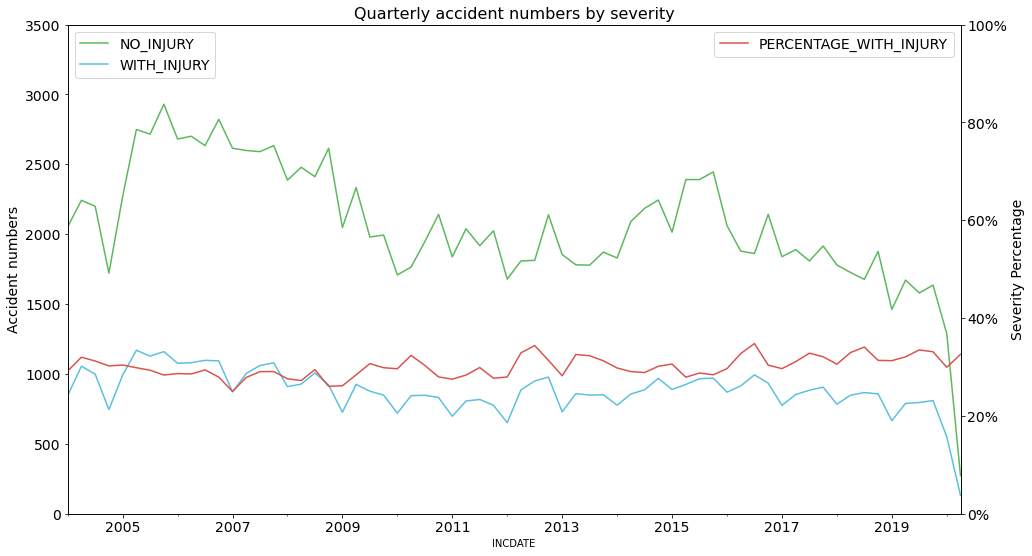

In [51]:
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_quarter_severity_plot.plot(kind='line',figsize=(16,9), rot=0,
                          color=['#5cb85c', '#5bc0de', '#d9534f'], 
                          fontsize=14, zorder=2, ax=ax0
                         )

df_quarter_severity_percentage_plot = pd.DataFrame(
    data=df_quarter_severity_plot['WITH_INJURY']/(df_quarter_severity_plot['WITH_INJURY']+df_quarter_severity_plot['NO_INJURY']),
    columns=['PERCENTAGE_WITH_INJURY'])

df_quarter_severity_percentage_plot.plot(kind='line',figsize=(16,9), rot=0,
                          color=['#d9534f'], 
                          fontsize=14, zorder=2, ax=ax1
                         )

ax0.set_ylim(0,3500)
ax1.set_ylim(0,1)

ax0.legend(fontsize=14, loc=2)
ax1.legend(fontsize=14, loc=1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax0.set_title("Quarterly accident numbers by severity",fontsize=16)
ax0.set_ylabel("Accident numbers",fontsize=14)
ax1.set_ylabel("Severity Percentage",fontsize=14)

In [52]:
fig0.savefig('img/quarterly_numbers')

### <a name="3.3"></a>3.3. ANOVA [[ToC]](#ToC)

In [53]:
from scipy import stats

In [54]:
grouped_test = df_v2[['WEATHER','SEVERITYCODE']].groupby(['WEATHER'])
df_v2['WEATHER'].value_counts(dropna=False).to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
NaN,5081
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56


In [55]:
f_val, p_val = stats.f_oneway(
    grouped_test.get_group('Clear')['SEVERITYCODE'], 
    grouped_test.get_group('Raining')['SEVERITYCODE'], 
    grouped_test.get_group('Overcast')['SEVERITYCODE'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 18.236826341147676 , P = 1.2041667644621963e-08


In [56]:
f_val, p_val = stats.f_oneway(
    grouped_test.get_group('Clear')['SEVERITYCODE'], 
    grouped_test.get_group('Raining')['SEVERITYCODE'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 25.09876170660936 , P = 5.453197502895751e-07


In [57]:
f_val, p_val = stats.f_oneway(
    grouped_test.get_group('Clear')['SEVERITYCODE'], 
    grouped_test.get_group('Overcast')['SEVERITYCODE'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 4.909741750003867 , P = 0.026707249184972547


In [58]:
f_val, p_val = stats.f_oneway(
    grouped_test.get_group('Raining')['SEVERITYCODE'], 
    grouped_test.get_group('Overcast')['SEVERITYCODE'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 32.11870221519134 , P = 1.4568807019555952e-08


### <a name="3.4"></a>3.4. Correlation [[ToC]](#ToC)

In [114]:
import seaborn as sns

In [115]:
df_weather_severity = df_v2[['SEVERITYCODE']]

In [61]:
df_weather_severity = pd.concat([df_weather_severity,pd.get_dummies(df_v2['WEATHER'])], axis=1)
#df_weather_severity.rename(columns={1: "NO_INJURY",2: "WITH_INJURY"},inplace=True)
df_weather_severity

,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,2,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,0,1,0,0,0,0,0,0,0,0,0
194669,1,0,0,0,0,0,0,1,0,0,0,0
194670,2,0,1,0,0,0,0,0,0,0,0,0
194671,2,0,1,0,0,0,0,0,0,0,0,0


In [62]:
corr_w = df_weather_severity.corr()

In [63]:
corr_w.style.background_gradient(cmap='Reds')

,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
SEVERITYCODE,1.000000,-0.001150,0.059436,0.003518,-0.022824,0.014813,0.003333,0.037883,-0.000468,-0.002691,-0.016495,-0.155038
Blowing Sand/Dirt,-0.001150,1.000000,-0.019565,-0.000918,-0.001111,-0.006911,-0.000086,-0.007684,-0.000192,-0.000409,-0.001161,-0.004917
Clear,0.059436,-0.019565,1.000000,-0.062449,-0.075565,-0.469924,-0.005845,-0.522479,-0.013072,-0.027797,-0.078913,-0.334357
Fog/Smog/Smoke,0.003518,-0.000918,-0.062449,1.000000,-0.003547,-0.022059,-0.000274,-0.024526,-0.000614,-0.001305,-0.003704,-0.015695
Other,-0.022824,-0.001111,-0.075565,-0.003547,1.000000,-0.026692,-0.000332,-0.029677,-0.000742,-0.001579,-0.004482,-0.018992
Overcast,0.014813,-0.006911,-0.469924,-0.022059,-0.026692,1.000000,-0.002065,-0.184557,-0.004617,-0.009819,-0.027875,-0.118106
Partly Cloudy,0.003333,-0.000086,-0.005845,-0.000274,-0.000332,-0.002065,1.000000,-0.002296,-0.000057,-0.000122,-0.000347,-0.001469
Raining,0.037883,-0.007684,-0.522479,-0.024526,-0.029677,-0.184557,-0.002296,1.000000,-0.005134,-0.010917,-0.030992,-0.131315
Severe Crosswind,-0.000468,-0.000192,-0.013072,-0.000614,-0.000742,-0.004617,-0.000057,-0.005134,1.000000,-0.000273,-0.000775,-0.003285
Sleet/Hail/Freezing Rain,-0.002691,-0.000409,-0.027797,-0.001305,-0.001579,-0.009819,-0.000122,-0.010917,-0.000273,1.000000,-0.001649,-0.006986


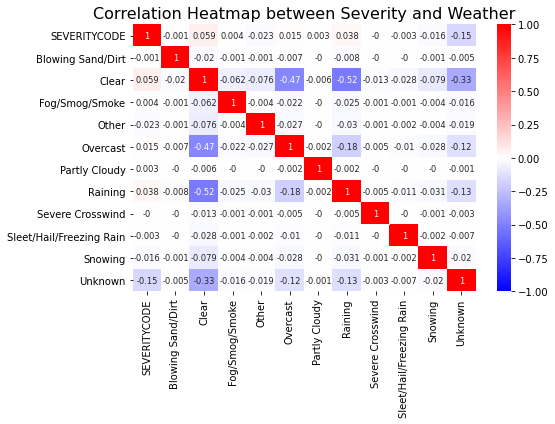

In [116]:
fsns, axsns = plt.subplots(figsize=(8, 6))
axsns = sns.heatmap(corr_w.round(3),
                 vmin=-1,
                 vmax=1,
                 cmap='bwr',
                 annot=True,
                 annot_kws=dict(fontsize='small')
                )
axsns.set_title("Correlation Heatmap between Severity and Weather",fontsize=16)
plt.tight_layout()

In [117]:
fsns.savefig('img/corr_weather_heatmap')

### <a name="3.5"></a>3.5. Data Visualization: Waffle Chart [[ToC]](#ToC)

In [66]:
%matplotlib inline
from pywaffle import Waffle

In [67]:
def generateWaffle(df,title,title_fontsize,legend_fontsize,figsize,icons,icon_size):
    fig = plt.figure(
        FigureClass=Waffle,
        rows=5,
        columns=20,  # Either rows or columns could be omitted
        labels= [f"{k} ({v})" for k, v in df.items()],
        values=df,
        icon_legend=True,
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': legend_fontsize},
        title={'label': title, 'loc': 'left', 'fontsize': title_fontsize},
        figsize=figsize,
        icons=icons,
        icon_size=icon_size
    )
    return fig

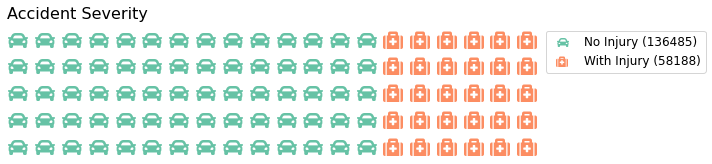

In [68]:
data = df_v2['SEVERITYCODE'].value_counts(dropna=False).to_frame()
data.rename(index={1:'No Injury',2:'With Injury'},inplace=True)
title = 'Accident Severity'
title_fontsize = 16
legend_fontsize = 12
figsize = (10,2.6)
icons = ['car','medkit']
icon_size = 20
fig = generateWaffle(data['SEVERITYCODE'],title,title_fontsize,legend_fontsize,figsize,icons,icon_size)

In [69]:
fig.savefig('img/waffle_severity')

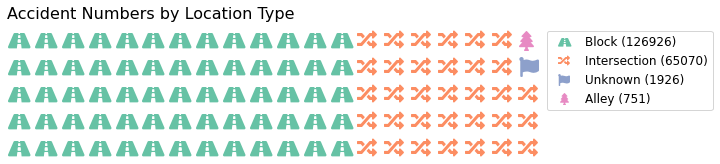

In [70]:
data = df_v2['ADDRTYPE'].value_counts(dropna=False).to_frame()
data.rename(index={np.nan:'Unknown'},inplace=True)
title = 'Accident Numbers by Location Type'
title_fontsize = 16
legend_fontsize = 12
figsize = (10.1,2.6)
icons = ['road','random','flag','tree']
icon_size = 20
fig = generateWaffle(data['ADDRTYPE'],title,title_fontsize,legend_fontsize,figsize,icons,icon_size)

In [71]:
fig.savefig('img/waffle_location')

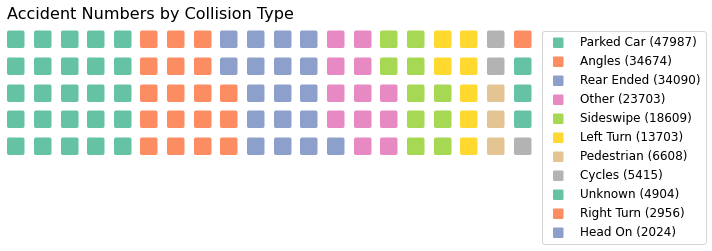

In [72]:
data = df_v2['COLLISIONTYPE'].value_counts(dropna=False).to_frame()
data.rename(index={np.nan:'Unknown'},inplace=True)
title = 'Accident Numbers by Collision Type'
title_fontsize = 16
legend_fontsize = 12
figsize = (10,3.6)
#icons = ['road','hashtag','flag','tree']
icons = 'square'
icon_size = 20
fig = generateWaffle(data['COLLISIONTYPE'],title,title_fontsize,legend_fontsize,figsize,icons,icon_size)

In [73]:
fig.savefig('img/waffle_collision_type')

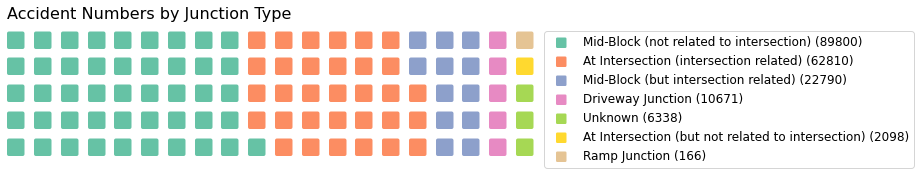

In [74]:
data = df_v2['JUNCTIONTYPE'].replace([np.nan],'Unknown').value_counts(dropna=False).to_frame()
data.rename(index={np.nan:'Unknown'},inplace=True)
title = 'Accident Numbers by Junction Type'
title_fontsize = 16
legend_fontsize = 12
figsize = (11.8,2.6)
#icons = ['road','hashtag','flag','tree']
icons = 'square'
icon_size = 20
fig = generateWaffle(data['JUNCTIONTYPE'],title,title_fontsize,legend_fontsize,figsize,icons,icon_size)

In [75]:
fig.savefig('img/waffle_junction')

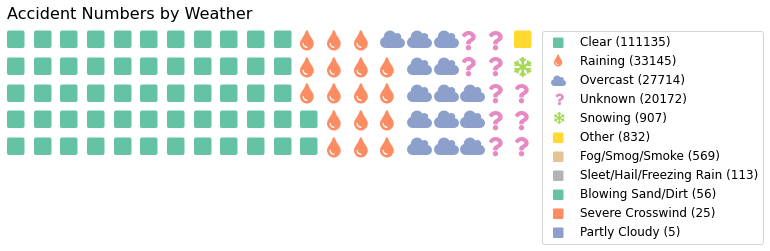

In [76]:
data = df_v2['WEATHER'].replace([np.nan],'Unknown').value_counts(dropna=False).to_frame()
data.rename(index={np.nan:'Unknown'},inplace=True)
title = 'Accident Numbers by Weather'
title_fontsize = 16
legend_fontsize = 12
figsize = (10.8,3.3)
#icons = ['road','hashtag','flag','tree']
icons = ['square'] * 11
icons[1] = 'tint'
icons[2] = 'cloud'
icons[3] = 'question' 
icons[4] = 'snowflake' 
icon_size = 20
fig = generateWaffle(data['WEATHER'],title,title_fontsize,legend_fontsize,figsize,icons,icon_size)

In [77]:
fig.savefig('img/waffle_weather')

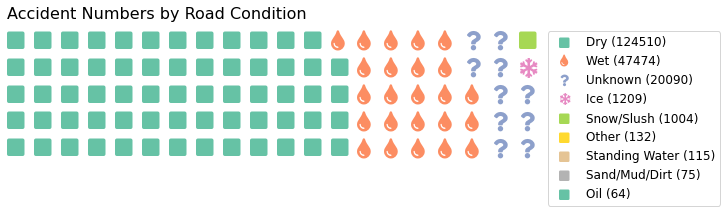

In [78]:
data = df_v2['ROADCOND'].replace([np.nan],'Unknown').value_counts(dropna=False).to_frame()
title = 'Accident Numbers by Road Condition'
title_fontsize = 16
legend_fontsize = 12
figsize = (10.2,3.2)
#icons = ['road','hashtag','flag','tree']
#icons = 'square'
icons = ['square'] * 9
icons[1] = 'tint'
icons[2] = 'question' 
icons[3] = 'snowflake'
#icons[4] = 'question' 
icon_size = 20
fig = generateWaffle(data['ROADCOND'],title,title_fontsize,legend_fontsize,figsize,icons,icon_size)

In [79]:
fig.savefig('img/waffle_road')

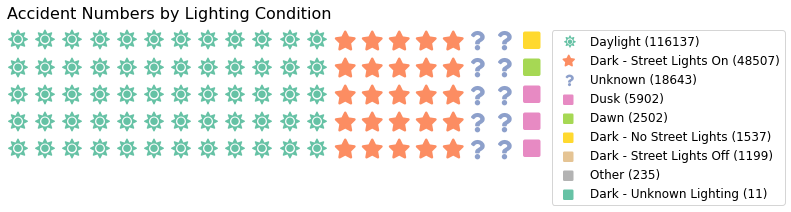

In [80]:
data = df_v2['LIGHTCOND'].replace([np.nan],'Unknown').value_counts(dropna=False).to_frame()
title = 'Accident Numbers by Lighting Condition'
title_fontsize = 16
legend_fontsize = 12
figsize = (11.1,3.5)
#icons = ['road','hashtag','flag','tree']
#icons = 'square'
icons = ['square'] * 9
icons[0] = 'sun'
icons[1] = 'star'
icons[2] = 'question' 
#icons[3] = 'snowflake'
#icons[4] = 'question' 
icon_size = 20
fig = generateWaffle(data['LIGHTCOND'],title,title_fontsize,legend_fontsize,figsize,icons,icon_size)

In [81]:
fig.savefig('img/waffle_lighting')

### <a name="3.6"></a>3.6. Data Visualization: Map with MarkerCluster [[ToC]](#ToC)

### <a name="3.6.1"></a>3.6.1. Map with MarkerCluster: Accidents in 2019 [[ToC]](#ToC)

In [82]:
grouped_test = df_v2[['X','Y','SEVERITYCODE','INCDATE']].copy().groupby(df_v2['INCDATE'].dt.strftime('%Y').copy())
#grouped_test['SEVERITYCODE'].value_counts(dropna=False).to_frame()

In [83]:
df_loc = grouped_test.get_group('2019').copy()
df_loc.dropna(inplace=True)

In [84]:
#df_loc = df_v2[['X','Y','SEVERITYCODE']]
#df_loc.dropna(inplace=True)
#df_loc = df_loc.tail(10).copy()
df_loc
#df_loc.head()


,X,Y,SEVERITYCODE,INCDATE
5,-122.387598,47.690575,1,2019-04-20 00:00:00+00:00
25,-122.312857,47.599218,2,2019-04-25 00:00:00+00:00
35,-122.318741,47.676567,1,2019-04-27 00:00:00+00:00
45,-122.307487,47.592295,1,2019-05-17 00:00:00+00:00
58,-122.347339,47.661445,2,2019-07-05 00:00:00+00:00
...,...,...,...,...
194661,-122.306092,47.617881,2,2019-03-22 00:00:00+00:00
194663,-122.299160,47.579673,2,2019-01-09 00:00:00+00:00
194666,-122.344569,47.694547,2,2019-01-04 00:00:00+00:00
194670,-122.306689,47.683047,2,2019-01-19 00:00:00+00:00


In [85]:
import folium
from folium import plugins
seattle_map_mc_2019 = folium.Map(
    location=[47.608013, -122.335167],
    zoom_start=11,
    tiles='OpenStreetMap'
)

incidents_mc_2019 = plugins.MarkerCluster().add_to(seattle_map_mc_2019)

for lat, lng, label, in zip(df_loc.Y, df_loc.X, df_loc.SEVERITYCODE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents_mc_2019)

In [ ]:
seattle_map_mc_2019

In [87]:
seattle_map_mc_2019.save('html/markercluster_2019.html')

### <a name="3.6.2"></a>3.6.2. Map with MarkerCluster: Pedestrian Rights Were not Granted [[ToC]](#ToC)

In [88]:
df_pedrownotgrnt = df_v2[df_v2['PEDROWNOTGRNT']=='Y'][['X','Y','SEVERITYCODE','INCDATE','PEDROWNOTGRNT']].copy()#.groupby(df_v2['INCDATE'].dt.strftime('%Y').copy())
df_pedrownotgrnt[['PEDROWNOTGRNT']].value_counts()

#grouped_test['SEVERITYCODE'].value_counts(dropna=False).to_frame()

PEDROWNOTGRNT
Y                4667
dtype: int64

In [89]:
#df_loc = grouped_test.get_group('2019').copy()
#df_loc.dropna(inplace=True)

In [90]:
#df_loc = df_v2[['X','Y','SEVERITYCODE']]
#df_loc.dropna(inplace=True)
#df_loc = df_loc.tail(10).copy()
df_pedrownotgrnt.dropna(inplace=True)
df_pedrownotgrnt
#df_loc.head()


,X,Y,SEVERITYCODE,INCDATE,PEDROWNOTGRNT
52,-122.328913,47.613466,2,2013-03-29 00:00:00+00:00,Y
79,-122.312464,47.652976,1,2013-03-28 00:00:00+00:00,Y
84,-122.302233,47.599281,2,2010-03-10 00:00:00+00:00,Y
117,-122.383315,47.643384,2,2006-08-09 00:00:00+00:00,Y
149,-122.291686,47.626528,2,2004-10-12 00:00:00+00:00,Y
...,...,...,...,...,...
194308,-122.351487,47.624570,2,2018-11-19 00:00:00+00:00,Y
194329,-122.328913,47.613466,2,2018-10-28 00:00:00+00:00,Y
194412,-122.329062,47.586170,2,2019-01-28 00:00:00+00:00,Y
194495,-122.343912,47.611837,2,2019-01-05 00:00:00+00:00,Y


In [91]:
import folium
from folium import plugins
seattle_map_pedrownotgrnt = folium.Map(
    location=[47.608013, -122.335167],
    zoom_start=11,
    tiles='OpenStreetMap'
)

incidents_pedrownotgrnt = plugins.MarkerCluster().add_to(seattle_map_pedrownotgrnt)

for lat, lng, label, in zip(df_pedrownotgrnt.Y, df_pedrownotgrnt.X, df_pedrownotgrnt.SEVERITYCODE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents_pedrownotgrnt)

In [ ]:
seattle_map_pedrownotgrnt

In [93]:
seattle_map_pedrownotgrnt.save('html/markercluster_pedrownotgrnt.html')

### <a name="3.6.3"></a>3.6.3. Map with MarkerCluster: On Mid-block, Speeding, and Under Alcohol Influence [[ToC]](#ToC)

In [94]:
df_v2[['UNDERINFL']].value_counts()

UNDERINFL
N            100274
0             80394
Y              5126
1              3995
dtype: int64

In [95]:
df_v2[(df_v2['UNDERINFL']=='Y') | (df_v2['UNDERINFL']=='1')].shape

(9121, 27)

In [96]:
df_v2[(df_v2['PEDROWNOTGRNT']!='Y') & (df_v2['JUNCTIONTYPE']=='At Intersection (intersection related)') & ((df_v2['UNDERINFL']=='Y') | (df_v2['UNDERINFL']=='1'))].shape

(2028, 27)

In [97]:
df_intersectinfl = df_v2[(df_v2['JUNCTIONTYPE']=='At Intersection (intersection related)') & ((df_v2['UNDERINFL']=='Y') | (df_v2['UNDERINFL']=='1'))][['X','Y','SEVERITYCODE','INCDATE']].copy()#.groupby(df_v2['INCDATE'].dt.strftime('%Y').copy())
df_intersectinfl[['SEVERITYCODE']].value_counts()

#grouped_test['SEVERITYCODE'].value_counts(dropna=False).to_frame()

SEVERITYCODE
2               1094
1               1021
dtype: int64

In [98]:
#df_loc = grouped_test.get_group('2019').copy()
#df_loc.dropna(inplace=True)

In [99]:
#df_loc = df_v2[['X','Y','SEVERITYCODE']]
#df_loc.dropna(inplace=True)
#df_loc = df_loc.tail(10).copy()
df_intersectinfl.dropna(inplace=True)
df_intersectinfl
#df_loc.head()


,X,Y,SEVERITYCODE,INCDATE
110,-122.289280,47.690198,1,2013-03-26 00:00:00+00:00
124,-122.322187,47.618733,2,2013-03-29 00:00:00+00:00
227,-122.351646,47.617584,1,2013-03-29 00:00:00+00:00
540,-122.279013,47.526117,1,2010-04-23 00:00:00+00:00
686,-122.316733,47.612889,2,2005-11-24 00:00:00+00:00
...,...,...,...,...
194287,-122.324029,47.609802,1,2018-11-22 00:00:00+00:00
194367,-122.312749,47.733952,1,2018-12-30 00:00:00+00:00
194418,-122.327250,47.661355,1,2019-01-24 00:00:00+00:00
194432,-122.271503,47.519048,1,2019-01-26 00:00:00+00:00


In [103]:
import folium
from folium import plugins
seattle_map_intersectinfl = folium.Map(
    location=[47.608013, -122.335167],
    zoom_start=11,
    tiles='OpenStreetMap'
)

incidents_intersectinfl = plugins.MarkerCluster().add_to(seattle_map_intersectinfl)

for lat, lng, label, in zip(df_intersectinfl.Y, df_intersectinfl.X, df_intersectinfl.SEVERITYCODE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents_intersectinfl)

In [ ]:
seattle_map_intersectinfl

In [105]:
seattle_map_intersectinfl.save('html/markercluster_intersectinfl.html')

### <a name="3.6.3"></a>3.6.3. Map with MarkerCluster: At Intersection and Under Alcohol Influence [[ToC]](#ToC)

In [106]:
df_v2[['SPEEDING']].value_counts()

SPEEDING
Y           9333
dtype: int64

In [95]:
df_v2[(df_v2['UNDERINFL']=='Y') | (df_v2['UNDERINFL']=='1')].shape

(9121, 27)

In [107]:
df_v2[(df_v2['PEDROWNOTGRNT']!='Y') & (df_v2['JUNCTIONTYPE']=='Mid-Block (not related to intersection)') & (df_v2['SPEEDING']=='Y') & ((df_v2['UNDERINFL']=='Y') | (df_v2['UNDERINFL']=='1'))].shape

(751, 27)

In [109]:
df_midbspeedinfl = df_v2[(df_v2['PEDROWNOTGRNT']!='Y') & (df_v2['JUNCTIONTYPE']=='Mid-Block (not related to intersection)') & (df_v2['SPEEDING']=='Y') & ((df_v2['UNDERINFL']=='Y') | (df_v2['UNDERINFL']=='1'))][['X','Y','SEVERITYCODE','INCDATE']].copy()#.groupby(df_v2['INCDATE'].dt.strftime('%Y').copy())
df_midbspeedinfl[['SEVERITYCODE']].value_counts()

#grouped_test['SEVERITYCODE'].value_counts(dropna=False).to_frame()

SEVERITYCODE
1               396
2               355
dtype: int64

In [98]:
#df_loc = grouped_test.get_group('2019').copy()
#df_loc.dropna(inplace=True)

In [110]:
#df_loc = df_v2[['X','Y','SEVERITYCODE']]
#df_loc.dropna(inplace=True)
#df_loc = df_loc.tail(10).copy()
df_midbspeedinfl.dropna(inplace=True)
df_midbspeedinfl
#df_loc.head()


,X,Y,SEVERITYCODE,INCDATE
251,-122.336122,47.601189,2,2004-04-24 00:00:00+00:00
934,-122.355551,47.725275,2,2004-04-26 00:00:00+00:00
2001,-122.320736,47.572090,2,2010-10-26 00:00:00+00:00
2022,-122.332653,47.708655,2,2007-04-27 00:00:00+00:00
2226,-122.297200,47.733791,1,2012-10-19 00:00:00+00:00
...,...,...,...,...
193236,-122.339476,47.671542,1,2018-12-23 00:00:00+00:00
193330,-122.271158,47.519864,1,2018-11-24 00:00:00+00:00
193719,-122.403929,47.577106,1,2018-11-16 00:00:00+00:00
193862,-122.334847,47.529005,1,2018-10-09 00:00:00+00:00


In [111]:
import folium
from folium import plugins
seattle_map_midbspeedinfl = folium.Map(
    location=[47.608013, -122.335167],
    zoom_start=11,
    tiles='OpenStreetMap'
)

incidents_midbspeedinfl = plugins.MarkerCluster().add_to(seattle_map_midbspeedinfl)

for lat, lng, label, in zip(df_midbspeedinfl.Y, df_midbspeedinfl.X, df_midbspeedinfl.SEVERITYCODE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents_midbspeedinfl)

In [ ]:
seattle_map_midbspeedinfl

In [113]:
seattle_map_midbspeedinfl.save('html/markercluster_midbspeedinfl.html')

### <a name="3.7"></a>3.7. Data Visualization: Choropleth Map [[ToC]](#ToC)

Check and assign city council district for each accident data point

In [119]:
import json
from shapely.geometry import shape, Point

### <a name="3.7.1"></a>3.7.1. City Council District [[ToC]](#ToC)

In [120]:
df_loc = df_v2[['X','Y','SEVERITYCODE']].copy()
df_loc.dropna(inplace=True)
df_loc = df_loc.copy()
#df_loc = df_loc.tail(10000).copy()
#df_loc.head()

In [121]:
dataNo = len(df_loc.X)
districtList = [np.nan] * dataNo
#len(districtList)
#df_loc['district']

In [122]:
df_loc['district'] = pd.DataFrame(districtList)
#df_loc.iloc[0]

Download city-council-districts.geojson from github/seattleio

In [123]:
#!wget --quiet https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/city-council-districts.geojson -O city-council-districts.geojson

In [124]:
with open('city-council-districts.geojson') as f:
    js = json.load(f)

coorPos=0
for lat, lng, in zip(df_loc.Y, df_loc.X):
    point = Point(lng, lat)
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            #print(feature['properties']['district'])
            df_loc.iloc[coorPos,df_loc.columns.get_loc('district')] = feature['properties']['district']
            #print(df_loc['district'].iloc[coorPos])
            #print('Found containing polygon:', feature['properties']['district'])
    coorPos=coorPos+1

df_loc.dropna(inplace=True)
#df_loc['district'][df_loc['district'].isna()]

In [125]:
df_district = df_loc['district'].value_counts(dropna=False).to_frame().reset_index().copy()
df_district.rename(columns={'district': "value_counts",'index': "district"},inplace=True)
df_district
tableMD(df_district)

|   district |   value_counts |
|-----------:|---------------:|
|          2 |          39198 |
|          7 |          37047 |
|          3 |          30195 |
|          6 |          21235 |
|          1 |          20276 |
|          4 |          20274 |
|          5 |          19832 |


In [1067]:
import folium
Choro_map = folium.Map(
    location=[47.608013, -122.335167],
    zoom_start=11,
    tiles='OpenStreetMap'
)

Choro_geo = r'city-council-districts.geojson'

Choro_map.choropleth(
    geo_data=Choro_geo,
    data=df_district,
    columns=['district', 'value_counts'],
    key_on='feature.properties.district',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.7,
    legend_name="Total Numbers of Accidents by District in 2004-2020"
)

/home/zulkarnain/app/anaconda3/envs/juplab/lib/python3.8/site-packages/folium/folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
Choro_map

### <a name="3.7.2"></a>3.7.2. Neighborhoods - 2009 [[ToC]](#ToC)

In [126]:
grouped_test = df_v2[['X','Y','SEVERITYCODE','INCDATE']].copy().groupby(df_v2['INCDATE'].dt.strftime('%Y').copy())
#grouped_test['SEVERITYCODE'].value_counts(dropna=False).to_frame()

In [127]:
df_2009 = grouped_test.get_group('2009').copy()

In [128]:
df_loc2009 = df_2009[['X','Y','SEVERITYCODE']].copy()
df_loc2009.dropna(inplace=True)
df_loc2009 = df_loc2009.copy()
#df_loc2 = df_loc2.tail(10000).copy()
#df_loc2.head()

In [129]:
dataNo = len(df_loc2009.X)
neighList = [np.nan] * dataNo
#len(districtList)
#df_loc['district']

In [130]:
df_loc2009['neigh'] = pd.DataFrame(neighList)
df_loc2009.iloc[0]

X              -122.383802
Y                47.583715
SEVERITYCODE      1.000000
neigh                  NaN
Name: 19, dtype: float64

Download neighborhoods.geojson from github/seattleio

In [131]:
#!wget --quiet https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/neighborhoods.geojson -O neighborhoods.geojson

In [132]:
with open('neighborhoods.geojson') as f:
    js = json.load(f)

coorPos=0
for lat, lng, in zip(df_loc2009.Y, df_loc2009.X):
    point = Point(lng, lat)
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            #print(feature['properties']['name'])
            df_loc2009.iloc[coorPos,df_loc2009.columns.get_loc('neigh')] = feature['properties']['name']
            #print(df_loc['neigh'].iloc[coorPos])
            #print('Found containing polygon:', feature['properties']['name'])
    coorPos=coorPos+1

df_loc2009.dropna(inplace=True)

In [133]:
df_neigh2009 = df_loc2009['neigh'].value_counts(dropna=False).to_frame().reset_index().copy()
df_neigh2009.rename(columns={'neigh': "value_counts",'index': "neigh"},inplace=True)
df_neigh2009

,neigh,value_counts
0,Belltown,539
1,Industrial District,457
2,University District,454
3,Broadway,431
4,Central Business District,429
...,...,...
87,Briarcliff,14
88,North Beach - Blue Ridge,12
89,Sand Point,6
90,White Center,6


In [134]:
import folium
Choro_neigh_map_2009 = folium.Map(
    location=[47.608013, -122.335167],
    zoom_start=11,
    tiles='OpenStreetMap'
)

Choro_neigh_geo = r'neighborhoods.geojson'

Choro_neigh_map_2009.choropleth(
    geo_data=Choro_neigh_geo,
    data=df_neigh2009,
    columns=['neigh', 'value_counts'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    nan_fill_opacity=0.0,
    bins=[0, 100, 200, 300, 400, 500, 600],
    legend_name='Numbers of Accidents by Neighborhood in 2009'
)

/home/zulkarnain/app/anaconda3/envs/juplab/lib/python3.8/site-packages/folium/folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
Choro_neigh_map_2009

### <a name="3.7.3"></a>3.7.3. Neighborhoods - 2019 [[ToC]](#ToC)

In [136]:
df_2019 = grouped_test.get_group('2019').copy()
df_loc2 = df_2019[['X','Y','SEVERITYCODE']].copy()
df_loc2.dropna(inplace=True)
df_loc2 = df_loc2.copy()
#df_loc2 = df_loc2.tail(10000).copy()
#df_loc2.head()

In [137]:
dataNo = len(df_loc2.X)
neighList = [np.nan] * dataNo
#len(districtList)
#df_loc['district']

In [138]:
df_loc2['neigh'] = pd.DataFrame(neighList)
df_loc2.iloc[0]

X              -122.387598
Y                47.690575
SEVERITYCODE      1.000000
neigh                  NaN
Name: 5, dtype: float64

Download neighborhoods.geojson from github/seattleio

In [139]:
#!wget --quiet https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/neighborhoods.geojson -O neighborhoods.geojson

In [140]:
with open('neighborhoods.geojson') as f:
    js = json.load(f)

coorPos=0
for lat, lng, in zip(df_loc2.Y, df_loc2.X):
    point = Point(lng, lat)
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            #print(feature['properties']['name'])
            df_loc2.iloc[coorPos,df_loc2.columns.get_loc('neigh')] = feature['properties']['name']
            #print(df_loc['neigh'].iloc[coorPos])
            #print('Found containing polygon:', feature['properties']['name'])
    coorPos=coorPos+1

df_loc2.dropna(inplace=True)

In [141]:
df_neigh = df_loc2['neigh'].value_counts(dropna=False).to_frame().reset_index().copy()
df_neigh.rename(columns={'neigh': "value_counts",'index': "neigh"},inplace=True)
df_neigh

,neigh,value_counts
0,Industrial District,500
1,Central Business District,414
2,Belltown,394
3,University District,329
4,Broadway,293
...,...,...
86,Briarcliff,9
87,Windermere,9
88,White Center,8
89,Sand Point,7


In [142]:
import folium
Choro_neigh_map = folium.Map(
    location=[47.608013, -122.335167],
    zoom_start=11,
    tiles='OpenStreetMap'
)

Choro_neigh_geo = r'neighborhoods.geojson'

Choro_neigh_map.choropleth(
    geo_data=Choro_neigh_geo,
    data=df_neigh,
    columns=['neigh', 'value_counts'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    nan_fill_color='grey',
    nan_fill_opacity=0.0, 
    nan_line_opacity=0.0,
    bins=[0, 100, 200, 300, 400, 500, 600],
    legend_name='Numbers of Accidents by Neighborhood in 2019'
)

/home/zulkarnain/app/anaconda3/envs/juplab/lib/python3.8/site-packages/folium/folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
Choro_neigh_map

### <a name="3.7.3"></a>3.7.3. Neighborhoods - Number Density - 2009 [[ToC]](#ToC)

In [98]:
#df_neigh2009
i=0
neighNo = len(df_neigh2009.neigh)
neighArea = [np.nan] * neighNo

for feature in js['features']:
    name = feature['properties']['name']
    area = feature['properties']['area']
    if len(df_neigh2009.index[df_neigh2009['neigh'] == name].tolist()) != 0:
        neighArea[df_neigh2009.index[df_neigh2009['neigh'] == name].tolist()[0]] = area/10**6
    #print(i,'. ', name,': ',area/1000000)
    i=i+1
#print(neighArea)

In [99]:
df_neigh2009['area'] = pd.DataFrame(neighArea)

In [100]:
df_neigh2009['density'] = pd.DataFrame(df_neigh2009['value_counts']/df_neigh2009['area'])

In [101]:
df_neigh2009.sort_values(by=["density"],ascending=[0]).head(92)

,neigh,value_counts,area,density
4,Central Business District,429,9.477399,45.265586
0,Belltown,539,14.974037,35.995637
48,Pike-Market,80,2.343359,34.139024
21,International District,174,6.169376,28.203826
27,Yesler Terrace,136,5.348937,25.425611
...,...,...,...,...
87,Briarcliff,14,26.550937,0.527288
88,North Beach - Blue Ridge,12,31.062265,0.386321
90,Sand Point,6,19.249857,0.311691
89,White Center,6,63.179941,0.094967


In [1074]:
import folium
Choro_neigh_dens_map_2009 = folium.Map(
    location=[47.608013, -122.335167],
    zoom_start=11,
    tiles='OpenStreetMap'
)

Choro_neigh_geo = r'neighborhoods.geojson'

Choro_neigh_dens_map_2009.choropleth(
    geo_data=Choro_neigh_geo,
    data=df_neigh2009,
    columns=['neigh', 'density'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    nan_fill_opacity=0.0,
    bins=[0, 2, 4, 8, 16, 32, 64],
    legend_name='Numbers per Area of Accidents by Neighborhood in 2009 (cases/km2)'
)

In [ ]:
Choro_neigh_dens_map_2009

### <a name="3.7.4"></a>3.7.4. Neighborhoods - Number Density - 2019 [[ToC]](#ToC)

In [104]:
#df_neigh2019
i=0
neighNo = len(df_neigh.neigh)
neighArea = [np.nan] * neighNo

for feature in js['features']:
    name = feature['properties']['name']
    area = feature['properties']['area']
    if len(df_neigh.index[df_neigh['neigh'] == name].tolist()) != 0:
        neighArea[df_neigh.index[df_neigh['neigh'] == name].tolist()[0]] = area/10**6
    #print(i,'. ', name,': ',area/1000000)
    i=i+1
#print(neighArea)

In [105]:
df_neigh['area'] = pd.DataFrame(neighArea)

In [106]:
df_neigh['density'] = pd.DataFrame(df_neigh['value_counts']/df_neigh['area'])

In [107]:
df_neigh.sort_values(by=["density"],ascending=[0])

,neigh,value_counts,area,density
1,Central Business District,414,9.477399,43.682873
40,Pike-Market,80,2.343359,34.139024
2,Belltown,394,14.974037,26.312209
5,Pioneer Square,276,11.474029,24.054324
19,International District,147,6.169376,23.827370
...,...,...,...,...
86,Windermere,9,22.363967,0.402433
90,Sand Point,7,19.249857,0.363639
87,Briarcliff,9,26.550937,0.338971
89,North Beach - Blue Ridge,7,31.062265,0.225354


In [1076]:
import folium
Choro_neigh_dens_map_2019 = folium.Map(
    location=[47.608013, -122.335167],
    zoom_start=11,
    tiles='OpenStreetMap'
)

Choro_neigh_geo = r'neighborhoods.geojson'

Choro_neigh_dens_map_2019.choropleth(
    geo_data=Choro_neigh_geo,
    data=df_neigh,
    columns=['neigh', 'density'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    nan_fill_opacity=0.0,
    bins=[0, 2, 4, 8, 16, 32, 64],
    legend_name='Numbers per Area of Accidents by Neighborhood in 2019 (cases/km2)'
)

In [ ]:
Choro_neigh_dens_map_2019

In [110]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [111]:
def g(year):
    if year == 2009:
        return(Choro_neigh_dens_map_2009)
    if year == 2019:
        return(Choro_neigh_dens_map_2019)
    
interact(g, year=widgets.IntSlider(min=2009, max=2019, step=10, value=2009));

interactive(children=(IntSlider(value=2009, description='year', max=2019, min=2009, step=10), Output()), _dom_…

## <a name="4"></a>4. Accident Severity Classification [[ToC]](#ToC)

### <a name="4.1"></a>4.1. Data Preprocessing [[ToC]](#ToC)

#### <a name="4.1.1"></a>4.1.1. One Hot Encoding [[ToC]](#ToC)

In [129]:
df_v2_grouped_by_date = df_v2.copy().groupby(df_v2.copy()['INCDATE'].dt.strftime('%Y').copy())

In [340]:
df_v2_notna = df_v2.copy()

In [341]:
df_v2_notna = df_v2_notna[df_v2_notna['ADDRTYPE'].notna()]
df_v2_notna = df_v2_notna[df_v2_notna['JUNCTIONTYPE'].notna()]
df_v2_notna = df_v2_notna[df_v2_notna['JUNCTIONTYPE'] != 'Unknown']
df_v2_notna = df_v2_notna[df_v2_notna['UNDERINFL'].notna()]
df_v2_notna = df_v2_notna[df_v2_notna['WEATHER'].notna()]
df_v2_notna = df_v2_notna[df_v2_notna['WEATHER'] != 'Unknown']
df_v2_notna = df_v2_notna[df_v2_notna['WEATHER'] != 'Other']
df_v2_notna = df_v2_notna[df_v2_notna['ROADCOND'].notna()]
df_v2_notna = df_v2_notna[df_v2_notna['ROADCOND'] != 'Unknown']
df_v2_notna = df_v2_notna[df_v2_notna['ROADCOND'] != 'Other']
df_v2_notna = df_v2_notna[df_v2_notna['LIGHTCOND'].notna()]
df_v2_notna = df_v2_notna[df_v2_notna['LIGHTCOND'] != 'Unknown']
df_v2_notna = df_v2_notna[df_v2_notna['LIGHTCOND'] != 'Other']
df_v2_notna = df_v2_notna[df_v2_notna['HITPARKEDCAR'].notna()]
df_v2_notna.shape

(167335, 27)

In [342]:
df_v2_grouped_by_date = df_v2_notna.copy().groupby(df_v2_notna.copy()['INCDATE'].dt.strftime('%Y').copy())

In [343]:
df_v2_2019 = df_v2_grouped_by_date.get_group('2019').copy()

In [418]:
df_v3 = df_v2_notna[['SEVERITYCODE','INCDTTM','X','Y','ADDRTYPE','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']].copy()
df_v3.shape

(167335, 14)

In [419]:
df_v3 = df_v3[df_v3['ADDRTYPE'].notna()]
df_v3 = df_v3[df_v3['JUNCTIONTYPE'].notna()]
df_v3 = df_v3[df_v3['JUNCTIONTYPE'] != 'Unknown']
df_v3 = df_v3[df_v3['UNDERINFL'].notna()]
df_v3 = df_v3[df_v3['WEATHER'].notna()]
df_v3 = df_v3[df_v3['WEATHER'] != 'Unknown']
df_v3 = df_v3[df_v3['WEATHER'] != 'Other']
df_v3 = df_v3[df_v3['ROADCOND'].notna()]
df_v3 = df_v3[df_v3['ROADCOND'] != 'Unknown']
df_v3 = df_v3[df_v3['ROADCOND'] != 'Other']
df_v3 = df_v3[df_v3['LIGHTCOND'].notna()]
df_v3 = df_v3[df_v3['LIGHTCOND'] != 'Unknown']
df_v3 = df_v3[df_v3['LIGHTCOND'] != 'Other']
df_v3 = df_v3[df_v3['HITPARKEDCAR'].notna()]
df_v3.shape

(167335, 14)

In [420]:
#Feature = df_v3[['SEVERITYCODE']].copy()
#Feature

In [421]:
Feature = df_v3[['SEVERITYCODE','INCDTTM','X','Y']].copy()

In [422]:
Feature = pd.concat([Feature,pd.get_dummies(df_v3['ADDRTYPE'], prefix='Address')], axis=1)

In [423]:
Feature = pd.concat([Feature,pd.get_dummies(df_v3['JUNCTIONTYPE'], prefix='Junction')], axis=1)

In [424]:
Feature = pd.concat([Feature,df_v3['INATTENTIONIND'].copy().replace([np.nan,'Y'],[0,1])], axis=1)

In [425]:
Feature = pd.concat([Feature,df_v3['UNDERINFL'].copy().replace([np.nan,'N','0','Y','1'],[int(0),int(0),int(0),int(1),int(1)])], axis=1)

In [426]:
Feature = pd.concat([Feature,pd.get_dummies(df_v3['WEATHER'], prefix='Weather')], axis=1)

In [427]:
Feature = pd.concat([Feature,pd.get_dummies(df_v3['ROADCOND'], prefix='Road')], axis=1)

In [428]:
Feature = pd.concat([Feature,pd.get_dummies(df_v3['LIGHTCOND'], prefix='Light')], axis=1)

In [429]:
Feature = pd.concat([Feature,df_v3['PEDROWNOTGRNT'].copy().replace([np.nan,'Y'],[0,1])], axis=1)

In [430]:
Feature = pd.concat([Feature,df_v3['SPEEDING'].copy().replace([np.nan,'Y'],[0,1])], axis=1)

In [431]:
Feature = pd.concat([Feature,df_v3['HITPARKEDCAR'].copy().replace([np.nan,'N','Y'],[0,0,1])], axis=1)

In [432]:
Feature.shape
#Feature

(167335, 41)

In [433]:
Feature.dropna(inplace=True)
Feature.shape

(164726, 41)

In [1280]:
Feature[['SEVERITYCODE']].value_counts()

SEVERITYCODE
1               110183
2                54543
dtype: int64

In [434]:
Feature.dtypes

SEVERITYCODE                                                           int64
INCDTTM                                                       datetime64[ns]
X                                                                    float64
Y                                                                    float64
Address_Alley                                                          uint8
Address_Block                                                          uint8
Address_Intersection                                                   uint8
Junction_At Intersection (but not related to intersection)             uint8
Junction_At Intersection (intersection related)                        uint8
Junction_Driveway Junction                                             uint8
Junction_Mid-Block (but intersection related)                          uint8
Junction_Mid-Block (not related to intersection)                       uint8
Junction_Ramp Junction                                                 uint8

#### <a name="4.1.2"></a>4.1.2. Feature Selection [[ToC]](#ToC)

In [435]:
Feature_grouped_by_date = Feature.copy().groupby(Feature.copy()['INCDTTM'].dt.strftime('%Y').copy())

In [770]:
Feature_2019 = pd.concat([Feature_grouped_by_date.get_group('2004').copy(),
                          Feature_grouped_by_date.get_group('2005').copy(),
                          Feature_grouped_by_date.get_group('2006').copy(),
                          Feature_grouped_by_date.get_group('2007').copy(),
                          Feature_grouped_by_date.get_group('2008').copy(),
                          Feature_grouped_by_date.get_group('2009').copy(),
                          Feature_grouped_by_date.get_group('2010').copy(),
                          Feature_grouped_by_date.get_group('2011').copy(),
                          Feature_grouped_by_date.get_group('2012').copy(),
                          Feature_grouped_by_date.get_group('2013').copy(),
                          Feature_grouped_by_date.get_group('2014').copy(),
                          Feature_grouped_by_date.get_group('2015').copy(),
                          Feature_grouped_by_date.get_group('2016').copy(),
                          Feature_grouped_by_date.get_group('2017').copy(),
                          Feature_grouped_by_date.get_group('2018').copy(),
                          Feature_grouped_by_date.get_group('2019').copy()])

In [1282]:
Feature_2019.shape

(163544, 41)

In [1281]:
Feature_2019[['SEVERITYCODE']].value_counts()

SEVERITYCODE
1               109375
2                54169
dtype: int64

In [834]:
from sklearn.utils import resample

In [835]:
Feature_2019_majority = Feature_2019[Feature_2019.SEVERITYCODE==1]
Feature_2019_minority = Feature_2019[Feature_2019.SEVERITYCODE==2]

In [837]:
Feature_2019_majority_downsampled = resample(Feature_2019_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=54169,    # to match majority class
                                 random_state=123) # reproducible results

In [838]:
Feature_2019_downsampled = pd.concat([Feature_2019_majority_downsampled, Feature_2019_minority])

In [1279]:
Feature_2019_downsampled[['SEVERITYCODE']].value_counts()

SEVERITYCODE
2               54169
1               54169
dtype: int64

In [840]:
#X = Feature[['INATTENTIONIND','UNDERINFL']]
X = Feature_2019_downsampled.iloc[:,4:41]
X

,Address_Alley,Address_Block,Address_Intersection,Junction_At Intersection (but not related to intersection),Junction_At Intersection (intersection related),Junction_Driveway Junction,Junction_Mid-Block (but intersection related),Junction_Mid-Block (not related to intersection),Junction_Ramp Junction,INATTENTIONIND,...,Light_Dark - No Street Lights,Light_Dark - Street Lights Off,Light_Dark - Street Lights On,Light_Dark - Unknown Lighting,Light_Dawn,Light_Daylight,Light_Dusk,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
89417,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
105365,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
26053,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
130648,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
112523,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194661,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
194663,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
194666,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
194670,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [841]:
y = Feature_2019_downsampled.iloc[:,0]
y.value_counts()
#print(109375/(54169+109375))

2    54169
1    54169
Name: SEVERITYCODE, dtype: int64

#### <a name="4.1.3"></a>4.1.3. Standard Scaling [[ToC]](#ToC)

In [1379]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
pd.DataFrame(X[:,34]).value_counts()

-0.201025    104130
 4.974507      4208
dtype: int64

#### <a name="4.1.4"></a>4.1.4. Training-Test Set Splitting [[ToC]](#ToC)

In [843]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81253, 37) (81253,)
Test set: (27085, 37) (27085,)


### <a name="4.2"></a>4.2. K Nearest Neighbor(KNN) [[ToC]](#ToC)

In [844]:
from sklearn.neighbors import KNeighborsClassifier

In [845]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [846]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 2, 2, 2, 1])

In [847]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5477090076674092
Test set Accuracy:  0.540520583348717


#### <a name="4.2.1"></a> 4.2.1. Varying k-value [[ToC]](#ToC)

In [848]:
Ks = 10
mean_acc_KNN = np.zeros((Ks-1))
std_acc_KNN = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc_KNN[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc_KNN[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc_KNN

array([0.53, 0.52, 0.53, 0.54, 0.55, 0.55, 0.56, 0.55, 0.58])

In [1084]:
mean_acc_KNN = [0.53, 0.52, 0.53, 0.54, 0.55, 0.55, 0.56, 0.55, 0.58]

In [ ]:
for n in range(10,13):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc_KNN = np.append(mean_acc_KNN,metrics.accuracy_score(y_test, yhat))
    print(metrics.accuracy_score(y_test, yhat))
    std_acc_KNN = np.append(std_acc_KNN,np.std(yhat==y_test)/np.sqrt(yhat.shape[0]))



In [1086]:
mean_acc_KNN = np.append(mean_acc_KNN,[0.5552889052981355, 0.5547350932250323, 0.551670666420528])

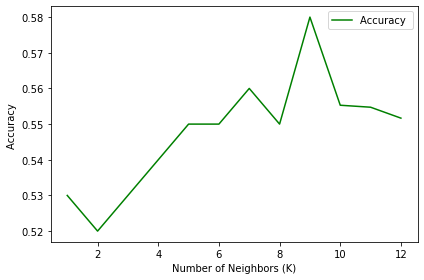

In [1107]:
fig, ax = plt.subplots()
ax.plot(range(1,13),mean_acc_KNN,'g')
#plt.fill_between(range(1,13),mean_acc_KNN - 1 * std_acc_KNN,mean_acc_KNN + 1 * std_acc_KNN, alpha=0.10)
ax.legend(['Accuracy '])
ax.set_ylabel('Accuracy ')
ax.set_xlabel('Number of Neighbors (K)')
plt.tight_layout()
#plt.show()

In [1108]:
fig.savefig('img/accuracy_KNN')

In [1082]:
mean_acc_KNN

array([0.56, 0.55, 0.55])

#### <a name="4.2.2"></a> 4.2.2. Chosen k value [[ToC]](#ToC)

In [915]:
k_best = 9
neigh_best = KNeighborsClassifier(n_neighbors = k_best).fit(X_train,y_train)
yhat = neigh_best.predict(X_test)
mean_acc_k_best = metrics.accuracy_score(y_test, yhat)
  
std_acc_k_best=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc_k_best

0.5830164297581687

### <a name="4.3"></a> 4.3. Decision Tree [[ToC]](#ToC)

In [851]:
from sklearn.tree import DecisionTreeClassifier

In [852]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [853]:
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [854]:
from sklearn import metrics
import matplotlib.pyplot as plt
predTree = loanTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5970094148052427


#### <a name="4.3.1"></a> 4.3.1. Iterative process to choose max_depth [[ToC]](#ToC)

In [855]:
max_depths = 10
mean_acc = np.zeros((max_depths-1))
std_acc = np.zeros((max_depths-1))
ConfustionMx = [];
for n in range(1,max_depths):
    
    #Train Model and Predict  
    tree_i = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=tree_i.predict(X_test)
    mean_acc = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


array([0.53, 0.59, 0.59, 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 ])

In [1109]:
mean_acc = [0.53, 0.59, 0.59, 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 ]

"\nplt.plot(range(1,Ks),mean_acc,'g')\nplt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)\nplt.legend(('Accuracy ', '+/- 3xstd'))\nplt.ylabel('Accuracy ')\nplt.xlabel('Number of Nabors (K)')\nplt.tight_layout()\nplt.show()\n"

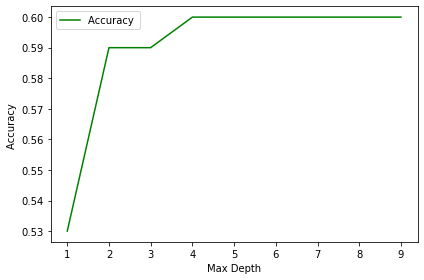

In [1110]:
fig, ax = plt.subplots()
ax.plot(range(1,10),mean_acc,'g')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
ax.legend(['Accuracy '])
ax.set_ylabel('Accuracy ')
ax.set_xlabel('Max Depth')
plt.tight_layout()
#plt.show()


In [1111]:
fig.savefig('img/accuracy_decision_tree')

In [913]:
for n in range(10,13):
    #Train Model and Predict  
    tree_i = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    tree_i.fit(X_train,y_train)
    yhat=tree_i.predict(X_test)
    mean_acc = np.append(mean_acc,metrics.accuracy_score(y_test, yhat))
    print(metrics.accuracy_score(y_test, yhat))
    std_acc = np.append(std_acc,np.std(yhat==y_test)/np.sqrt(yhat.shape[0]))

mean_acc

0.5992985047074026
0.5994092671220232
0.5989292966586671


array([0.53, 0.59, 0.59, 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 ,
       0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 ])

In [898]:
mean_acc

array([0.53, 0.59, 0.59, 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 ])

In [857]:
np.array(mean_acc).argsort()[-2:][::-1]

array([5, 6])

#### <a name="4.3.2"></a> 4.3.2. Visualization of each max_depth (5 and 6) [[ToC]](#ToC)

In [858]:
!pip install pydotplus

In [859]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


##### A. Max_depth = 5

In [1024]:
tree_i = DecisionTreeClassifier(criterion="entropy", max_depth = 5).fit(X_train,y_train)

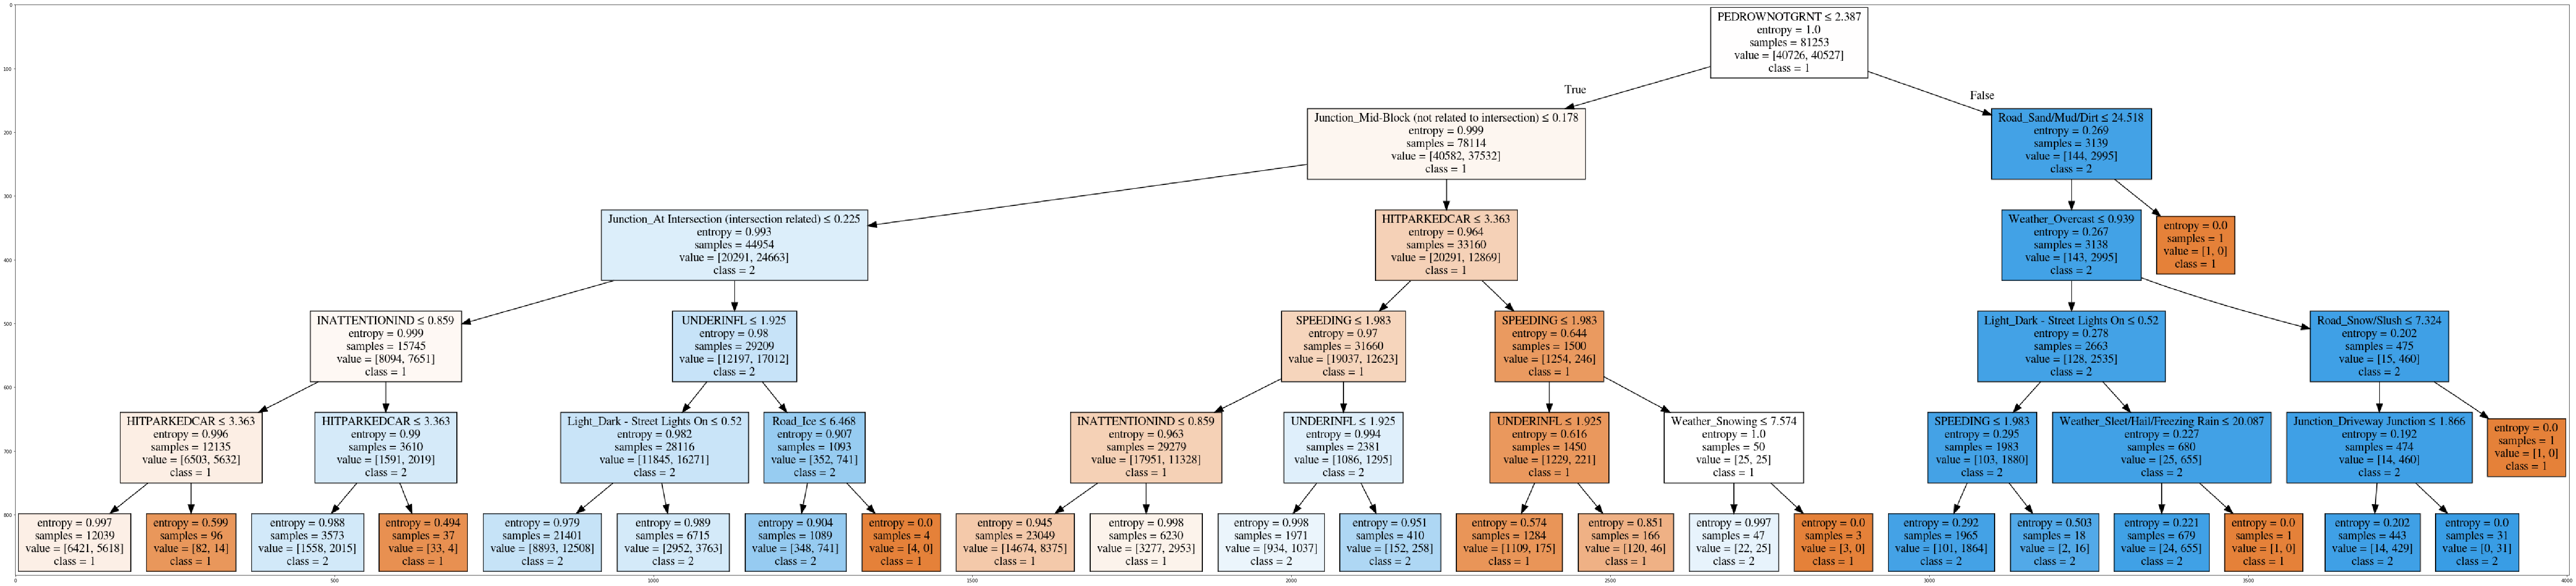

In [1025]:
dot_data = StringIO()
filename = "img/drugtree_depth_5.png"
featureNames = Feature_2019_downsampled.columns[4:41]
targetNames = df_v3['SEVERITYCODE'].unique().tolist()
out=tree.export_graphviz(tree_i,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train.apply(str)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

##### B. Max_depth = 6

In [1022]:
tree_i = DecisionTreeClassifier(criterion="entropy", max_depth = 6).fit(X_train,y_train)

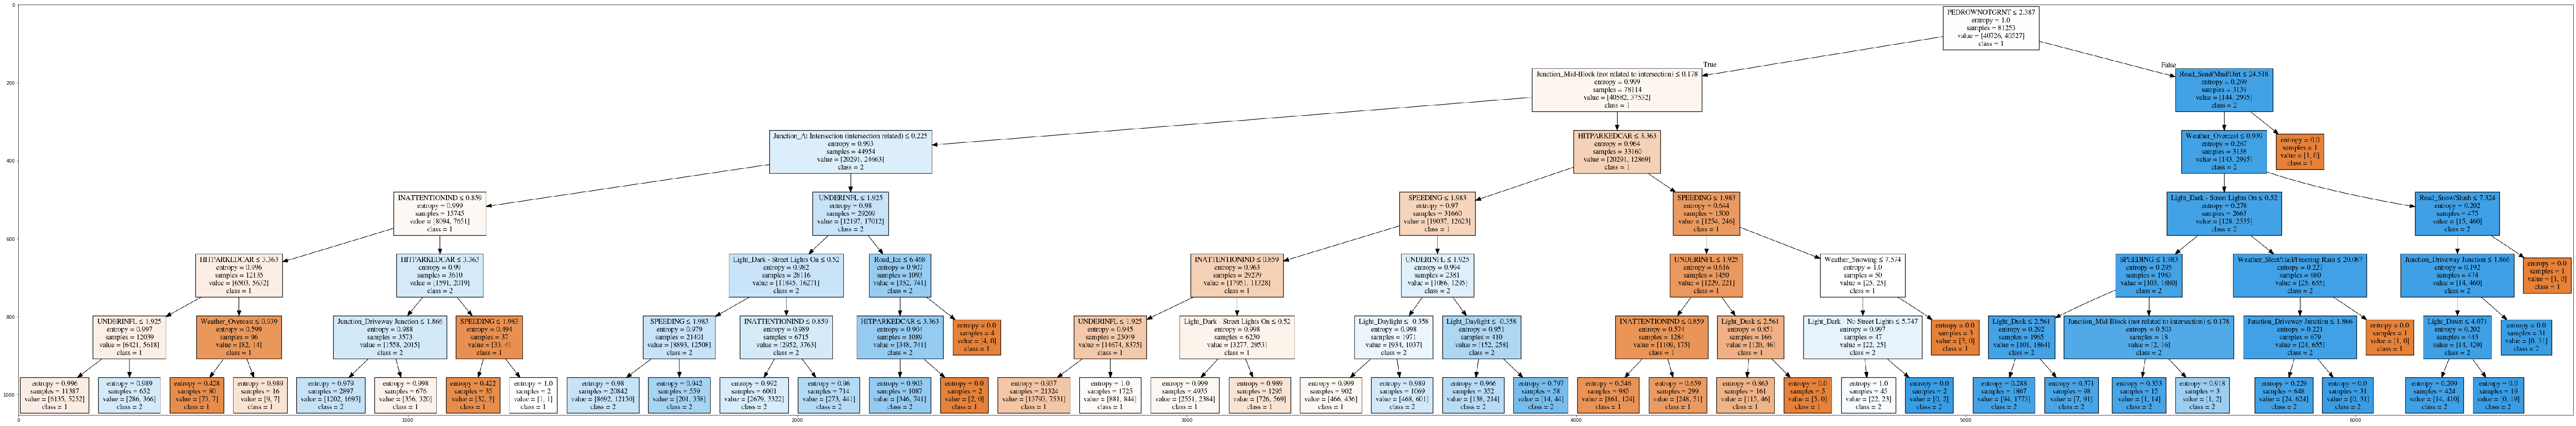

In [1023]:
dot_data = StringIO()
filename = "img/drugtree_depth_6.png"
featureNames = Feature_2019_downsampled.columns[4:41]
targetNames = df_v3['SEVERITYCODE'].unique().tolist()
out=tree.export_graphviz(tree_i,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train.apply(str)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

#### <a name="4.3.3"></a> 4.3.3. Chosen max_depth (5) [[ToC]](#ToC)

In [1026]:
max_depth_best = 5

In [1027]:
tree_i = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth_best).fit(X_train,y_train)

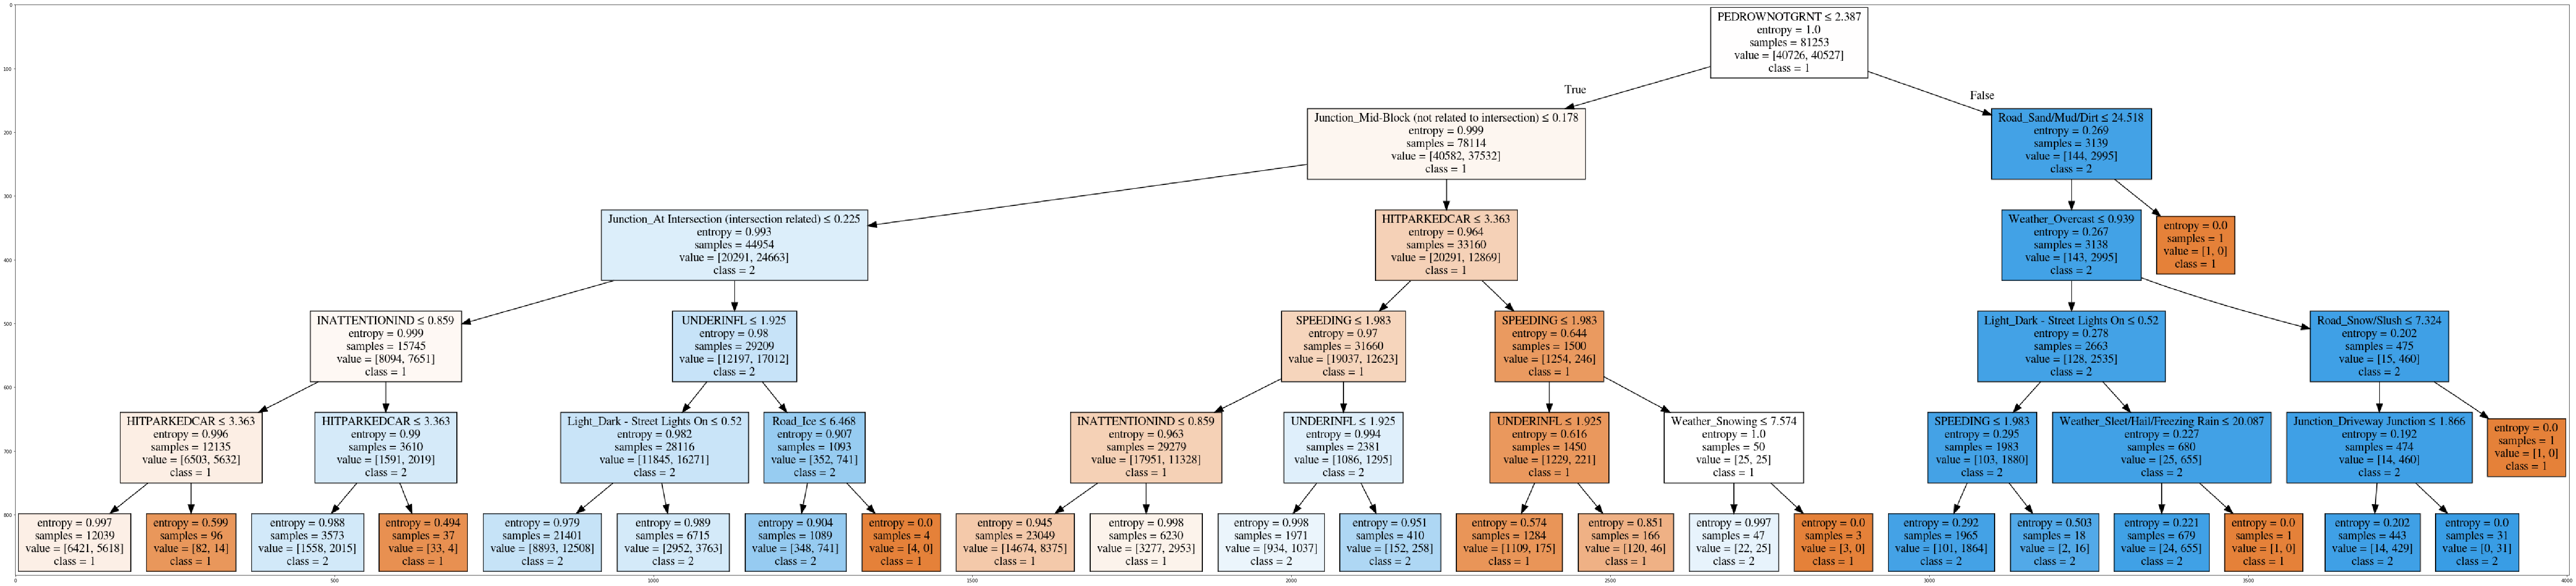

In [1028]:
dot_data = StringIO()
filename = "img/drugtree_depth_5.png"
featureNames = Feature_2019_downsampled.columns[4:41]
targetNames = df_v3['SEVERITYCODE'].unique().tolist()
out=tree.export_graphviz(tree_i,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train.apply(str)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [867]:
yhat=tree_i.predict(X_test)
mean_acc_SVM = metrics.accuracy_score(y_test, yhat)
mean_acc_SVM 

0.5992985047074026

### <a name="4.4"></a> 4.4. Support Vector Machine [[ToC]](#ToC)

In [868]:
from sklearn import svm

In [869]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1113]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 2, 1, 2, 1])

#### <a name="4.4.1"></a> 4.4.1. Evaluation [[ToC]](#ToC)

In [871]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [1291]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.59      0.62      0.61     13443
           2       0.61      0.58      0.59     13642

    accuracy                           0.60     27085
   macro avg       0.60      0.60      0.60     27085
weighted avg       0.60      0.60      0.60     27085

Confusion matrix, without normalization
[[8353 5090]
 [5786 7856]]


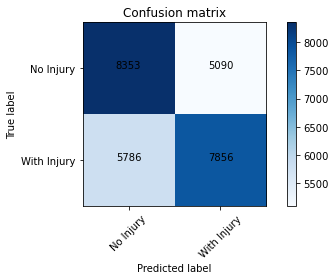

In [1283]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','With Injury'],normalize= False,  title='Confusion matrix')
plt.tight_layout()

In [1284]:
fig.savefig('img/confusion_matrix')

In [874]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5982599198330484

In [875]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/home/zulkarnain/app/anaconda3/envs/juplab/lib/python3.8/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


0.5984493261953111

In [876]:
mean_acc_SVM = metrics.accuracy_score(y_test, yhat)
mean_acc_SVM 

0.5984493261953111

### <a name="4.5"></a> 4.5. Logistic Regression [[ToC]](#ToC)

In [877]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [878]:
yhat = LR.predict(X_test)
yhat[0:5]

array([1, 2, 1, 2, 1])

In [879]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.67, 0.33],
       [0.42, 0.58],
       [0.62, 0.38],
       [0.24, 0.76],
       [0.61, 0.39]])

In [880]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/home/zulkarnain/app/anaconda3/envs/juplab/lib/python3.8/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


0.5995200295366439

### <a name="4.6"></a> 4.6. Model Evaluation using Test set [[ToC]](#ToC)

In [881]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#### <a name="4.6.1"></a> 4.6.1. Test Set for Evaluation (Jan-May 2020) [[ToC]](#ToC)

##### A. One Hot Encoding

In [882]:
Feature_2020 = Feature_grouped_by_date.get_group('2020').copy()

In [883]:
Feature_2020['SEVERITYCODE'].value_counts()

1    808
2    374
Name: SEVERITYCODE, dtype: int64

In [884]:
#X = Feature[['INATTENTIONIND','UNDERINFL']]
X_test_final = Feature_2020.iloc[:,4:41]
X_test_final

,Address_Alley,Address_Block,Address_Intersection,Junction_At Intersection (but not related to intersection),Junction_At Intersection (intersection related),Junction_Driveway Junction,Junction_Mid-Block (but intersection related),Junction_Mid-Block (not related to intersection),Junction_Ramp Junction,INATTENTIONIND,...,Light_Dark - No Street Lights,Light_Dark - Street Lights Off,Light_Dark - Street Lights On,Light_Dark - Unknown Lighting,Light_Dawn,Light_Daylight,Light_Dusk,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
7,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
47,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
65,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
87,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193091,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
193097,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
193108,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
193122,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [885]:
y_test_final = Feature_2020.iloc[:,0]
y_test_final

7         2
18        2
47        1
65        2
87        1
         ..
193091    1
193097    1
193108    2
193122    1
193151    1
Name: SEVERITYCODE, Length: 1182, dtype: int64

In [886]:
from sklearn import preprocessing

X_test_final= preprocessing.StandardScaler().fit(X_test_final).transform(X_test_final)
X_test_final.shape

(1182, 37)

#### <a name="4.6.2"></a> 4.6.2. Metrics Calculations [[ToC]](#ToC)

##### A. KNN

In [1341]:
F1 = [0] * 4
Ja = [0] * 4
Ll = [np.nan] * 4
Metrics_Ch4 = pd.DataFrame(np.array([F1,Ja,Ll]).transpose(), columns=['F1 score','Jaccard similarity score','Log loss score'])
Metrics_Ch4 = Metrics_Ch4.set_index(pd.Index(['KNN','Decision Tree','SVM','Logistic Regression']))

In [1342]:
k_best = 9
#neigh_best = KNeighborsClassifier(n_neighbors = k_best).fit(X_train,y_train)
yhat_final = neigh_best.predict(X_test_final)
Metrics_Ch4.iloc[0,0] = f1_score(y_test_final, yhat, average='weighted')

In [1343]:
Metrics_Ch4.iloc[0,1] = jaccard_similarity_score(y_test_final, yhat_final)

/home/zulkarnain/app/anaconda3/envs/juplab/lib/python3.8/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


              precision    recall  f1-score   support

           1       0.71      0.47      0.56       808
           2       0.34      0.59      0.43       374

    accuracy                           0.51      1182
   macro avg       0.53      0.53      0.50      1182
weighted avg       0.59      0.51      0.52      1182

Confusion matrix, without normalization
[[378 430]
 [153 221]]


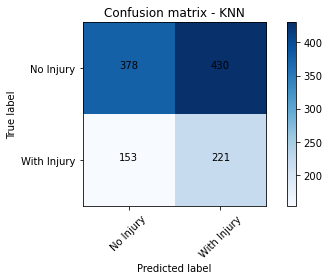

In [1344]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_final, yhat_final, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test_final, yhat_final))

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','With Injury'],normalize= False,  title='Confusion matrix - KNN')
plt.tight_layout()

In [1345]:
fig.savefig('img/confusion_matrix_KNN_final')

##### B. Decision Tree

In [1346]:
max_depth_best = 5
#tree_i = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth_best).fit(X_train,y_train)
yhat_final=tree_i.predict(X_test_final)
Metrics_Ch4.iloc[1,0] = f1_score(y_test_final, yhat_final, average='weighted') 

In [1347]:
Metrics_Ch4.iloc[1,1] = jaccard_similarity_score(y_test_final, yhat_final)

/home/zulkarnain/app/anaconda3/envs/juplab/lib/python3.8/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


              precision    recall  f1-score   support

           1       0.78      0.61      0.68       808
           2       0.42      0.62      0.50       374

    accuracy                           0.61      1182
   macro avg       0.60      0.61      0.59      1182
weighted avg       0.66      0.61      0.63      1182

Confusion matrix, without normalization
[[494 314]
 [143 231]]


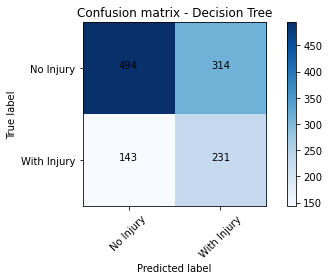

In [1348]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_final, yhat_final, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test_final, yhat_final))

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','With Injury'],normalize= False,  title='Confusion matrix - Decision Tree')
plt.tight_layout()

In [1349]:
fig.savefig('img/confusion_matrix_DT_final')

##### C. SVM

In [1350]:
yhat_final = clf.predict(X_test_final)
yhat_final [0:5]
Metrics_Ch4.iloc[2,0] = f1_score(y_test_final, yhat_final, average='weighted') 

In [1351]:
Metrics_Ch4.iloc[2,1] = jaccard_similarity_score(y_test_final, yhat_final)

/home/zulkarnain/app/anaconda3/envs/juplab/lib/python3.8/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


              precision    recall  f1-score   support

           1       0.77      0.62      0.69       808
           2       0.43      0.60      0.50       374

    accuracy                           0.62      1182
   macro avg       0.60      0.61      0.60      1182
weighted avg       0.66      0.62      0.63      1182

Confusion matrix, without normalization
[[505 303]
 [148 226]]


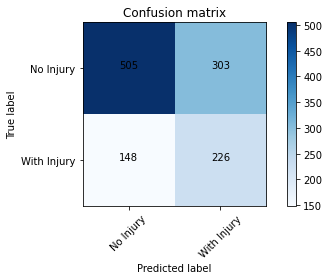

In [1335]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_final, yhat_final, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test_final, yhat_final))

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','With Injury'],normalize= False,  title='Confusion matrix - ')
plt.tight_layout()

In [1336]:
fig.savefig('img/confusion_matrix_SVM_final')

##### D. Logistic Regression

In [1353]:
yhat_final = LR.predict(X_test_final)
yhat_final[0:5]
yhat_prob_final = LR.predict_proba(X_test_final)
yhat_prob_final[0:5]
Metrics_Ch4.iloc[3,0] = f1_score(y_test_final, yhat_final, average='weighted') 

In [1354]:
Metrics_Ch4.iloc[3,1] = jaccard_similarity_score(y_test_final, yhat_final)

/home/zulkarnain/app/anaconda3/envs/juplab/lib/python3.8/site-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


In [1355]:
from sklearn.metrics import log_loss
Metrics_Ch4.iloc[3,2] = log_loss(y_test_final, yhat_prob_final)

In [1358]:
log_loss(y_test_final, yhat_prob_final)

0.651836807621906

In [1359]:
log_loss(y_test_final, yhat_final)

23.61080998461204

              precision    recall  f1-score   support

           1       0.78      0.60      0.68       808
           2       0.42      0.63      0.50       374

    accuracy                           0.61      1182
   macro avg       0.60      0.61      0.59      1182
weighted avg       0.66      0.61      0.62      1182

Confusion matrix, without normalization
[[483 325]
 [138 236]]


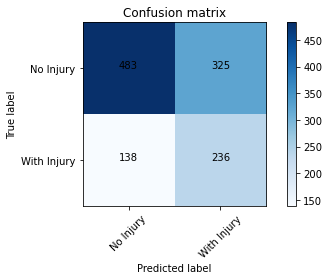

In [1356]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_final, yhat_final, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test_final, yhat_final))

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','With Injury'],normalize= False,  title='Confusion matrix')
plt.tight_layout()

In [1357]:
fig.savefig('img/confusion_matrix_LR_final')

#### <a name="4.6.3"></a> 4.6.3. Summary [[ToC]](#ToC)

In [1123]:
Metrics_Ch4
a = Metrics_Ch4
tableMD(a.reset_index())

| index               |   F1 score |   Jaccard similarity score |   Log loss score |
|:--------------------|-----------:|---------------------------:|-----------------:|
| KNN                 |   0.522397 |                   0.506768 |       nan        |
| Decision Tree       |   0.632704 |                   0.620135 |       nan        |
| SVM                 |   0.63095  |                   0.618443 |       nan        |
| Logistic Regression |   0.621832 |                   0.608291 |         0.651837 |
